<h2 style='text-align: center'> TELECOM - CAPSTONE PROJECT ON DATA ANALYTICS</h2>

<a id = Section31></a>
### **1.1 Introduction**

This consultation report provides an in-depth analysis of user data for a telecommunications project aimed at understanding user behavior across multiple dimensions such as device usage, geographic distribution, and demographics. The insights gathered from this analysis will help inform decisions on enhancing customer experience, marketing strategies, and operational efficiency.

<a id = Section31></a>
### **1.2 Problem Statement**

The primary problem addressed in this project is a lack of detailed knowledge regarding the distribution and behavior of users within a telecom network. Specifically, the client requires a clear understanding of:
- User distribution across states, age segments, and gender.
- Device preference and its correlation with demographic variables.
- Hourly trends in phone usae.


<a id = Section31></a>
### **2. Installing Libraries**

In [190]:
import pandas as pd                              # Importing for panel data analysis
import time                                      # Module provides various time-related functions
import numpy as np                               # To perform numerical operations
from geopy.geocoders import Nominatim, ArcGIS    # Transforms address or place name, into geographic coordinates and Vice versa
import matplotlib.pyplot as plt                  # Importing pyplot interface using matplotlib
import geopandas as gpd                          # Python library that allows users to work with geospatial data
#-------------------------------------------------------------------------------------------------------------------------------
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
# pd.set_option('display.float_format', lambda x: '%.5f' % x)       # To suppress scientific notation over exponential values
import seaborn as sns                                               # Importing seaborm library for visualization
sns.set_theme(style="white", palette="muted")
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [3]:
nom = ArcGIS()
geolocator = Nominatim(user_agent="google")     # To find locations by name and address (geocoding). It can also do the reverse, find an address for any location.

In [4]:
path = r'C:\personal\ML\CAPSTONE_PROJ\data'    # Path to Invoke the source data

<a id = Section31></a>
### **3. Data Acquisition**

In [192]:
# Read the Input Data set - events_data, Gender_age_train_new, phone_device_brand_model_new, India Geojson
df_event = pd.read_csv(path + '\events_data.csv', dtype={'device_id': str})
df_gender_age = pd.read_csv(path+'\\gender_age_train_new.csv', dtype={'device_id':'int64'})
df_gender_age['device_id'] = df_gender_age['device_id'].astype('str')
df_ph_device_brand = pd.read_csv(path+'\\phone_device_brand_model_new.csv',encoding='UTF-8', dtype={'device_id':'int64'})
df_ph_device_brand['device_id'] = df_ph_device_brand['device_id'].astype('str')
india_map = gpd.read_file(path+'\\india_telengana.geojson')

In [284]:
df_event.sample(4)  # Sample records from events_data table

,event_id,device_id,timestamp,longitude,latitude,city,state
1367802,746977,-6394978589441556553,2016-05-02 21:37:45,77.301853,28.768287,Delhi,Delhi
645813,104610,-7133531531986334033,2016-05-07 15:02:41,72.876167,18.981802,Mumbai,Maharashtra
2270679,1747061,8399811505889684607,2016-05-06 12:54:38,77.238013,28.758569,Delhi,Delhi
1455627,1491071,8793988737617892778,2016-05-01 00:46:30,72.864344,18.974909,Mumbai,Maharashtra


In [292]:
df_gender_age.sample(4) # Sample records from Gender_age_train_new table

,device_id,gender,age,group
10596,-6697839352623173632,M,27,M27-28
20963,-152041337887356224,M,25,M23-26
29048,-1242392384363087872,M,18,M22-
29559,4720056483895175168,M,47,M39+


In [290]:
df_ph_device_brand.sample(4) # Sample records from phone_device_brand_model_new table

,device_id,phone_brand,device_model,phone_brand_en,device_model_en
43286,1376830000000000000,Xiaomi,红米,Xiaomi,Redmi
32625,2440300000000000000,LG,G3,LG,G3
23325,-679142927640773248,Xiaomi,MI 2S,Xiaomi,MI 2S
59471,5424790000000000000,LeEco,超级手机1,LeEco,Superphone 1


****Note : While reading the dataset, device_id in each table is converted to string object, so that it bring to common format and data type ie string data type, hence it will be used to join/merge all the three tables and avoid showing the data in exponential notation****

<a id = Section31></a>
### **4. Pre-Profiling**

****<h4>4.1 Check the missing values in the Dataset </h4>****

In [6]:
df_event.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [295]:
df_gender_age.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [296]:
df_ph_device_brand.isnull().sum()

device_id          0
phone_brand        0
device_model       0
phone_brand_en     0
device_model_en    0
dtype: int64

**events_data** have the following **missing values**:
- **device_id** feature have **453** missing values.
- **longitude & latitude** feature have **423** missing values.
- **state** feature have **377** missing values. 

****<h4>4.2 Check the duplicate records in the Dataset </h4>****

In [298]:
df_event.duplicated().sum() # Returns the sum of a values - Indicates no of duplicated records.

0

In [301]:
df_gender_age.duplicated().sum()  # Returns the sum of a values - Indicates no of duplicated records.

0

In [302]:
df_ph_device_brand.duplicated().sum()  # Returns the sum of a values - Indicates no of duplicated records.

0

- Observed that there is **NO duplicate** records in the dataset.

****<h4>4.3 Check the Inconsistent records in the Dataset </h4>****

In [307]:
df_ph_device_brand['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       '奇酷', 'Meizu', '斐讯', '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米',
       'ZUK', '努比亚', '惠普', '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视',
       'LeEco', '海信', '百立丰', '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯',
       '聆韵', 'TCL', '酷珀', '爱派尔', 'LOGO', '青葱', '果米', '华硕', '艾优尼', '康佳',
       '邦华', '赛博宇华', '黑米', '昂达', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔',
       '糖葫芦', '亿通', '欧新', '酷比魔方', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '蓝魔',
       '西米', '大Q', '台电', '飞利浦', '唯米', '大显', '长虹', '优购', '维图', '青橙', '虾米',
       '夏新', '帷幄', '百加', 'SUGAR', '世纪星', '米奇', '智镁', '欧比', '基伍', '飞秒',
       '德赛', '易派', '谷歌', '广信', '诺亚信', '欧奇', 'MIL', '白米', '大可乐', '宝捷讯',
       '优语', '首云', '瑞高', '沃普丰', '鲜米', '凯利通', '金星数码', '唯比', '摩乐', '丰米',
       '奥克斯', '本为', 'PPTV', '欧乐迪'], dtype=object)

In [309]:
device_model_ch = df_ph_device_brand[df_ph_device_brand.device_model.str.contains(r'[^0-9a-zA-Z." "]')]
device_model_ch['device_model'].head()

4      红米Note2
5      红米Note3
11    大神F1Plus
12     note顶配版
14        星星1号
Name: device_model, dtype: object

Below is the observation in the **phone_device_brand_model_new** dataset:
- Most of the **Phone_brand** column values have **Chinese characters**.
- Few **device_model** column values have **Chinese characters**.

### Summary of the Pre-profiling on the dataset
- **events_data: device_id** feature have **453** missing values.
- **longitude & latitude** feature have **423** missing values.
- **longitude & latitude** feature have **invalid** values.
- **state** feature have **377** missing values.
- There is **NO duplicate** records in the dataset.
- Most of the **Phone_brand** column values have **Chinese characters**.
- Few **device_model** column values have **Chinese characters**.

<a id = Section31></a>
### **5. Pre-Processing**

****<h4>5.1 Handling of Missing Data </h4>****

****<h5>5.1.1 Handling of Missing Data in State Column </h5>****

In [7]:
# Step1: Records with the state missing values is saved in df_missing_state Dataframe
df_missing_state = df_event[df_event['state'].isna()]

In [ ]:
# Step2: latitude & longitude value is passed to the GeoPy Library, each state name returned for the specific latitude & longitude is saved in the df_missing_state dataframe.
df_missing_state['state'] = df_missing_state.apply(
    lambda row: geolocator.reverse((row['latitude'], row['longitude'])).raw['address'].get('state').replace(" ", ""), axis=1)

In [ ]:
# Step3: State name from df_missing_state is replaced with the missing value in the Original df_event Datframe:
for indx, rows in df_missing_state.iterrows():
    df_event.loc[indx,'state'] = rows.state

****<h5>5.1.2 Handling of Missing Data in Latitude, Longitude Columns </h5>****

In [10]:
# Step1: Create a Lookup table for City-State, Latitude, Longitude
df_loc_lookup = pd.DataFrame(columns=['city','state','city_state','latitude','longitude'])

In [11]:
# Step2: 
# city_state col : To pass the "city,state" to the geocode to get the coordinates.
# city and state col is created for merging.
df_loc_lookup["city_state"] = (df_event['city'] + ',' + df_event['state']).unique()
df_loc_lookup["city"] = df_loc_lookup["city_state"].apply(lambda x: pd.Series(str(x).split(",")[0]))
df_loc_lookup["state"] = df_loc_lookup["city_state"].apply(lambda x: pd.Series(str(x).split(",")[1]))

In [12]:
# Step3: Imported the geocode class from Geopy Python library to locate the coordinates (longitude & latitude) when "city,state" name is passed as input parameter.
for indx, rows in df_loc_lookup.iterrows():
    try:
        location = nom.geocode(rows['city_state'])
        latitude = location.latitude
        longitude = location.longitude
        df_loc_lookup.loc[indx, 'latitude'] = latitude
        df_loc_lookup.loc[indx, 'longitude'] = longitude
    except Exception as e:
       print("The error is: ",rows['city'], e)

In [14]:
# Step4: Merge the coordinates data from lookup table with the events_data table. 
# Note : After merging, longitude_y (expected/new column) and longitude_x (actual/existing column) will be available in events_data table.
df_merge_event_loc = df_event.merge(df_loc_lookup, on = ['city', 'state'], how = 'inner')
df_merge_event_loc.loc[:, ['longitude_x', 'latitude_x','longitude_y','latitude_y']] = df_merge_event_loc[['longitude_x', 'latitude_x','longitude_y','latitude_y']].fillna(0)

In [15]:
# Step5: Find the difference between the longitude_y and longitude_x value. same for latitude.
df_merge_event_loc['diff_long'] = df_merge_event_loc['longitude_y'] - df_merge_event_loc['longitude_x']
df_merge_event_loc['diff_lat'] = df_merge_event_loc['latitude_y'] - df_merge_event_loc['latitude_x']

In [16]:
# Step6: When the difference is more, update longitude_y (expected) value in longitude_x (actual) column. same for latitude.
# Note: This handles both the missing and wrong value in longitude & latitude.
df_merge_event_loc['longitude_x'] = df_merge_event_loc.apply(lambda row: row.longitude_y if row.diff_long >= 8 else row.longitude_x, axis = 1)
df_merge_event_loc['latitude_x'] = df_merge_event_loc.apply(lambda row: row.latitude_y if row.diff_lat >= 8 else row.latitude_x, axis = 1)

****<h5>5.1.3 Handling of Missing Data in device_id Columns </h5>****

In [17]:
# Sort the longitude,latitude,device_id column. so that Blank records appear at the bottom. 
# Apply the interpolate method and fill the missing value from the previous records. ie forward direction.
df_merge_event_loc = df_merge_event_loc.sort_values(by=['longitude_x','latitude_x','device_id'], ascending=[True,True,False]).interpolate(method='ffill',limit_direction='forward', axis=0)
df_merge_event_loc.sort_index(inplace=True)

In [18]:
df_merge_event_loc.rename(columns={'longitude_x': 'longitude', 'latitude_x': 'latitude'}, inplace=True)

****<h4>5.2 Handling of Inconsistent Data </h4>****

****<h5>5.2.1 Handling of Inconsistent Data in Phone Branch & Device Model Column </h5>****

In [25]:
# Step1: Create two lists phone_brand_ch and phone_brand_en to store the Chinese and English phone brand names respectively. 
# Note : Translated data is available in the phone_brand_en.
phone_brand_ch = ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei','奇酷', 'Meizu', '斐讯', '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米','ZUK', '努比亚', '惠普', '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视',
'LeEco', '海信', '百立丰', '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯','聆韵', 'TCL', '酷珀', '爱派尔', 'LOGO', '青葱', '果米', '华硕', '艾优尼', '康佳',
'邦华', '赛博宇华', '黑米', '昂达', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔','糖葫芦', '亿通', '欧新', '酷比魔方', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '蓝魔',
'西米', '大Q', '台电', '飞利浦', '唯米', '大显', '长虹', '优购', '维图', '青橙', '虾米','夏新', '帷幄', '百加', 'SUGAR', '世纪星', '米奇', '智镁', '欧比', '基伍', '飞秒',
'德赛', '易派', '谷歌', '广信', '诺亚信', '欧奇', 'MIL', '白米', '大可乐', '宝捷讯','优语', '首云', '瑞高', '沃普丰', '鲜米', '凯利通', '金星数码', '唯比', '摩乐', '丰米',
'奥克斯', '本为', 'PPTV', '欧乐迪']

In [26]:
phone_brand_en = ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei','Qiku', 'Meizu', 'Fixun', 'China mobile', 'Htc', 'Tianyue', 'Supreme', 'LG', 'Obosun', 'Umi','ZUK', 'Nubia', 'HP', 'Nibiru', 'Meitu', 'Hyangmi', 'Motorola', 'MonoMi', 'Hammer', 'FujiVision',
'LeEco', 'Hisense', 'Paragon', 'OnePlus', 'Yuxin', 'Haier', 'Kubi', 'Newman', 'Pocophone', 'Dovi','LINGYUN', 'TCL', 'COOPER', 'AIPAL', 'LOGO', 'GREEN ONION', 'GOMI', 'ASUS', 'AIYUNI', 'KONKA',
'Banghua', 'Saibo Yu Hua', 'Blackmi', 'Onda', 'Lovme', 'Pioneer', 'E Pai', 'Shenzhou', 'Nokia', 'Purnell','Sugarloaf', 'Yitong', 'OuXin', 'Scooby-Doo Cube', 'Little Poplar Tree', 'Bellefontaine', 'Nuomi', 'Miguel', 'E-People E-Book', 'Blue Magic',
'Simi', 'Big Q', 'Taito', 'Philips', 'Vimy', 'Daxian', 'Changhong', 'Ushou', 'Vitus', 'Green Orange', 'Shrimp','Xiaxin', 'Curtain', 'Baijia', 'Sugar', 'Century star', 'Mickey', 'Chi magnesium', 'Obi', 'Kivu', 'Femtosecond',
'Desai', 'ePai', 'Google', 'Guangxin', 'Noahs Mail', 'Ouchy', 'MIL', 'White Rice', 'Da Cola', 'Baojiexun','Yuyin', 'Shouyun', 'Regal', 'Wopfen', 'Fresh Rice', 'Keliton', 'Goldstar Digital', 'Vipi', 'Molle', 'Fonmil',
'Oxy', 'Benwei', 'PPTV', 'Oleander']

In [27]:
# Step1: Create two lists device_model_ch and device_model_en to store the Chinese and English device model names respectively. Note : Translated data is available in the device_model_en.
device_model_ch = ['Y13', 'V183', 'R7s', 'A368t', 'S5.1', 'Galaxy Grand Prime', 'MI 2S', 'Galaxy Note 2', 'R1C', 'Galaxy Mega 2', 'Galaxy S4', 'MI 3', 'Find 7', 'C8816', 'X6 L', 'Galaxy Win', 'MX3', 'Y35', '3000', 'C730Lw', 'A1', 'One', 'Galaxy J7', 'R3', 'MX2', 'MI 4', 'One M8', 'Galaxy S6 Edge', 'A3800d', 'P780', 'Ascend G7', 'Xperia SL', 'Y17T', 'Ascend P7', 'Galaxy Grand 2', 'Ascend P8', 'R2017', 'Mate 2', 'M8', 'X710L', 'A890e', 'R7', 'X5M', 'MX5', 'Galaxy Mega 5.8', 'L81', 'Xperia Z1', 'Galaxy J5', 'Galaxy Note 4', 'A31', 'GN706L', 'G3', 'P8 Lite', 'Sensation XE with Beats Audio Z715e', 'A880', 'X5L', '8720L', 'IVO 6655', 'R7 Plus', 'MX4', 'Galaxy S3', 'X3L', '3', 'R807', 'One X', 'R6007', 'Galaxy S2 Plus', 'R1', 'R823T', 'Mate 7', 'MI 2', 'F2', 'Galaxy S5', 'Xperia TX', 'Galaxy Trend DUOS 2', 'Z1', 'Y11IT', 'Ascend G700T', 'Galaxy Note 3', 'Galaxy R', 'F301', 'N1 Mini', 'Find 5', 'X5Pro', 'X5V', 'A11', 'MI pad', 'Z7 Mini', 'Galaxy Note 5', 'Galaxy Grand Neo Plus', 'Ascend GX1', 'R817', 'X3T', 'Galaxy E7', 'X817', 'GN700W', 'Y20T', 'A680', 'Y27', '5891', 'UIMI3', 'Compaq 7', 'G628', 'IVO 6622', 'B199', 'Galaxy Trend 3', 'X1ST', 'S7568I', 'C8818', 'Y622', '1107', 'Galaxy S2', 'Galaxy S4 Zoom', 'Galaxy Ace Dear', 'Ascend P1', 'R831T', 'M9', 'U9508', 'X5Max', '2', 'X8888', 'S60t', 'Xplay3S', 'R1S', 'Nexus 5', 'UIMI4', 'R809T', 'Q507T', 'Moto X Style', 'A788t', 'Y13iL', 'G610S', 'X1 7.0', 'Y613F', 'Galaxy A7', 'N1', 'Y23L', 'Y927', 'Z9 mini', 'X3S', 'Y15', 'R831S', 'R815T', 'R819T', 'Galaxy Core Prime', 'Butterfly', 'Galaxy Style DUOS', 'Xperia S', 'Galaxy Note 3 Lite', 'P6', 'S7', 'Galaxy S6', 'M210', 'S7I', 'A51', 'X907', 'Y33', 'Galaxy Grand DUOS', 'Xperia Z5', 'Xplay', 'MX4 Pro', '8185', 'G3588V', 'Y937', 'T528t', 'Galaxy A8', 'N3', 'G610T', 'S7T', 'V5 Max', 'MI One Plus', 'Xperia Z3 mini', '8105', 'M8St', 'Desire 820', 'A750', 'S898t', 'P970', 'Galaxy Mega 6.3', '5890', 'Z9 Max', 'PRO5', 'X5SL', 'Y29L', 'E602T', 'GN150', '8190Q', 'E620M', '8702D', 'Galaxy Grand', 'Galaxy Note', 'U960E', 'Grand X', 'Xperia arc S', 'T708', 'X', 'T50', 'GN128', 'L700T', 'Galaxy A5', 'F103S', '5951', 'H1', 'A820', 'G7200', 'LT01', 'Y11', 'Y635', 'Xperia Neo', 'G7 Plus', 'Y13L', '8056', 'EVO 3D X515m', 'Galaxy A3', 'Galaxy S2 HD LTE E120S', 'L5Pro', 'Ascend G700', 'Nexus 4', 'R827T', 'Ascend P6', 'ELIFE E3T', '5950', 'Q519T', 'Galaxy Tab P6800', 'A398t', 'Z5S', 'MI One C1', '8085q', 'A3900', 'M4', 'L1 mini', 'V188S', 'Grand X Quad', 'A320t', 'G2', 'Galaxy Core Advance', 'Y28L', 'Y22IL', 'F103', 'Y928', 'Galaxy Ace 3', 'R821T', 'MI 2A', 'Moto X', 'Y321C', 'Xperia Z2', 'I9118', '8750', 'K860i', 'N1T', 'A708t', 'A670t', 'S658t', 'Galaxy On7', 'Desire 820 Mini', 'Galaxy Ace', 'T1', 'A33', '603e', 'LT416', 'G11', 'S7568', 'T528w', '6607', '8730L', 'M2', 'Y11IW', 'W2015', 'R830', 'ELIFE S5.5', 'Q505T', '9190l', 'Galaxy Note Edge', 'Touch 2C', 'X3F', 'Y913', 'Galaxy Trend DUOS', 'Optimus G', '7296', 'M512', 'Galaxy On5', '7105', 'VIBE X', 'Mate 8', 'S1', 'MI 1S', '5263', 'S2y', 'A369', 'Grand Memo 2', 'Y923', 'M032', 'R8205', 'A688t', 'Touch 2', 'Galaxy Premier', 'Y37', 'U956', 'S810t', 'S650', 'L128', 'IPH8', '1100', 'S5830I', 'X6 Plus D', 'G606', 'B9388', 'Desire 826', 'Galaxy Core Lite', 'MI pad 2', 'A360t', 'G4', 'ono', 'Find', 'Galaxy Core Max', 'R5', 'A53', 'G718C', 'V5S', '3007', 'X6 Plus', 'S12', 'I779', 'Y1', 'Y18L', 'Blade S6 Lux', 'H1S', 'GN715', 'U879', 'Desire 7088', 'U930HD', 'Galaxy Note 10.1', 'G3818', 'X6 D', 'Blade A1', 'Galaxy Nexus', 'Desire 610t', 'Y19T', 'Galaxy S L', 'Galaxy S3 Mini', 'GN152', 'Desire 816', 'VIBE X2', 'A516', 'S7898', 'Moto X Pro', 'Y13T', 'S11T', 'VIBE Z2', 'A7', '7270', 'S6', 'Xperia C', '7295', 'V4', 'M5', 'H5', 'R833T', 'Grand S 2', 'G510', 'C8817E', '5263S', 'Y22L', 'S820', 'Y51', 'T329t', '7298D', 'Galaxy J3', 'C8815', 'P335M', 'S5.5L', '1105', '8729', 'T328w', 'Xperia Z', 'W2014', 'Galaxy Mega Plus', '5200S', 'Y613', 'Mate S', 'Galaxy Tab 3 8.0', 'T20L', 'U880F1', 'X8T', 'Two', 'N1 max', 'R820', 'L920', 'One S', 'Ulike2', 'A376', '8029', 'U707T', 'Galaxy Win Pro', 'Z5S Mini', 'ZenFone Max', 'E601M', 'GN708T', 'Xperia C3', 'I8268', 'Galaxy Tab 3 10.1', 'ZenFone 2', 'Y600D', 'S2L', 'Galaxy Tab 2 P3100', '8122', 'A580', 'U3', 'S720', 'Xperia acro S', 'X3V', 'GN151', 'X6', '5891Q', '5956', 'P316L', 'Y516', 'C8816D', '7269', 'U11', 'SOP M3', 'A828t', 'Y3T', '7295C', 'A850', 'U705T', 'A390', 'Galaxy Tab P3108', 'A789', 'E1T', 'A2800d', 'MI 2C', 'M031', 'C8813', 'A199', 'E6', '802w', 'Xperia T', 'D500', 'U701', '5219', 'R813T', 'D350', '8190', '7231', 'A678t', 'Galaxy Note 8.0', 'A380t', 'A820t', '7372', 'E1', 'X1S', '8195', 'S890', 'H7', 'Y320', 'Xperia P', 'Galaxy Ace 2', 'Q705U', 'U817', 'T2', 'S9', 'V719', 'A356', 'EG939', 'A388t', 'R811', 'V1', 'L22', '8720', 'S850t', 'V182', 'M100', 'iSuper S2', 'A798t', 'T9', 'C8813Q', 'EG978', 'Galaxy S Advance', '7620l', '8702', 'MI 4S', '8705', 'T29', 'Y17W', 'K68w', 'Xshot', 'Ascend G6', 'GN700T', 'P880', 'X50TS', 'M811', 'X68T', 'A390t', 'X6666', 'ZenFone 5', 'Galaxy Ace Plus', 'M1', 'Galaxy Tab S T705C', 'U809', 'MI 5', 'V8', 'XL', 'MOMO9', 'M310', 'X1', 'Galaxy Core Mini', 'GN5001S', 'IVO 6600', 'Galaxy Trend 2', 'Mate', '7320', 'U930', 'Y300', 'U7', 'A660', 'T3', 'P308L', 'U969', 'Xperia Z Ultra', 'T91', 'S920', 'Galaxy Tab 7.0 Plus', 'M701', 'A658t', 'Moto G', 'P331M', 'P700i', '7235', 'Galaxy S4 Active', 'E7', 'Xperia Z3', 'P1', '8085n', 'S5300', 'V987', 'K1', 'L7', 'P520L', 'P700', 'Galaxy S4 Mini', 'Xperia SP', 'V70', '7268', '5892', 'G521', 'V889D', 'iSuper S1', 'MM1101', 'L810', 'Xperia T2 Ultra', 'U960S3', '7230', 'Galaxy Gio', 'U9815', '8012', 'A630t', 'V818', 'Galaxy J1', 'Galaxy Fame', 'A800', 'T958', 'A820e', 'A278t', 'N1W', 'Y500', 'U960S', '9976A', 'GN100', 'X805', '8295M', 'C8817L', 'A505e', '8198T', 'GN137', 'K900', 'ME371MG', 'A520', 'J738M', 'A766', 'R9', 'S696', '9180', 'S868t', 'TALK 9X', 'Optimus LTE', 'A830', 'Galaxy Core 4G', 'V185', 'Y80D', 'G716', 'Galaxy W', 'Y22', 'R8000', 'E5', 'GN9002', 'E6T', 'Galaxy J', '5217', 'Z9', 'W999', 'XT615', 'Y627', 'Vibe Z2 Pro', '8079', 'Q802T', 'W2013', 'BF T18', 'E912S', '8295', 'V819 3G', 'A770e', 'S720i', 'Q501U', 'L1', 'E3', 'A698t', 'A765e', 'Y623', 'G717C', 'T329d', 'T8620', '3S', 'ivvi K1 mini', 'S5831I', '7296S', 'U966', 'Touch 3', 'A785e', 'T328t', 'T7', 'P8max', 'E8', 'VIBE Z', 'P306C', 'One E8', 'Q503U', 'Galaxy S2 Epic 4G Touch', 'P9', 'A298t', '201', 'Droid Ultra', 'T80', 'M812C', 'V955', '3005', 'L5 Plus', 'D800', 'S938t', 'XT1060', 'U950', 'A2580', 'S899t', 'VS980', 'U980', 'C8650', 'S850', 'U2', 'Vibe Shot', 'Desire 626', 'Z7 Max', 'Galaxy Mini', 'A750e', 'S7566', 'Galaxy Core 2', 'R805', 'GN305', 'Xperia ion', 'A760', 'i9', 'A399', 'S9T', 'Galaxy K Zoom', 'R5s plus', 'P332U', 'N910U', 'Blade S6', 'V956', 'EG970', 'S5.1Pro', 'MI 1', 'X80HD', 'A858t', 'V526', 'Y628', 'G610C', 'R801', 'Y3100', 'Touch 3c', 'F303', 'One max', '5360', 'A560', 'I9050', '7i', 'E613M', '8021', '8085', 'S686', 'S858t', 'P705', 'L8', 'G3609', 'E75T', 'Optimus G Pro', 'Galaxy Tab 3 Lite T111', 'R817T', 'N909', 'GN708W', 'C630Lw', 'VT898', 'Nexus S', 'Galaxy Golden', 'X2', 'S930', 'P70', 'C230w', '7260', 'AxonMini', '8712S', 'GT7', 'Galaxy Tab 4 T331C', 'One E9', 'Y31', 'Galaxy S7 Edge', 'Galaxy Trend', 'A318t', 'U807', 'XT910', 'A706', 'A330e', 'D520', 'K860', '8295c', 'ELIFE E6 mini', 'A630', 'Grand Era', 'TL1000', 'Z5', 'C8813DQ', 'T9508', 'R2010', 'Q201T', 'N821', 'idol X', 'DROID RAZR', 'ELIFE E7 Mini', 'A5', 'Ascend D2', 'Desire 616', 'V967S', 'X5', 'GN168t', 'YOGA Tablet B6000', 'G3819D', 'Galaxy Tab 2 P5110', 'V6', 'Y320T', 'A288t', 'Touch V', 'N910C', '5872', 'V9', 'Y330', '8732', '8070', 'Galaxy Y', 'S2', 'T967', 'T5', 'Galaxy S Plus', 'T9108', 'A308t', 'Galaxy Tab Pro T321', 'V975s Core4', 'Desire S', 'L168', 'GN705T', '7251', 'U5482', 'Xperia U', 'C986t', 'EV5', 'Galaxy Alpha', 'T528d', 'A656', 'S660', 'T60', 'Y325', 'Q7', 'I95', 'Galaxy S', 'D330', '5832', 'G525', 'Desire 310', 'EG966', 'V10', 'GN135', 'A378t', 'A889', 's820e', '8089', '7060', '5860S', '8076D', 'Xperia ZR ', '608t', 'GN810', 'Blade C', '7019', 'N828', 'S880i', 'M030', 'A208t', 'GN139', 'A628t', 'VT898S', 'U939', 'Q301C', 'Galaxy Ace DUOS', 'A269i', 'GN878', 'C8812', 'One M8 Eye', 'A238t', 'VT868', 'TS1018', 'T20', '8707', 'Desire 5088', 'T327w', 'M601', 'GN105', 'E600M', 'Xperia ZL', '606w', 'MK260', 'memo 5S', 'Desire 609d', 'S3', 'A3', 'Desire D516d', 'T8830Pro', 'N986', 'A6800', 'Galaxy Tab 3 7.0', 'Q701C', 'I630T', 'T35', '8713', 'E621T', 'P301M', 't789', 'U701T', 'Nexus 7', '5218S', 'M3', 'Q302C', 'U8825D', 'V919', 'IVO 6688', '5216D', 'T820', 'X920e', 'L820', 'S939', 'V95', 'S5Q', 'One M9', 'voga v1', 'M535', '5261', 'i1', 'idol3', 'G5', 'S5', 'A2860', 'T12', 'P8', '802d', 'T004', 'BF A500', 'Sensation Z710E', 'M5 Plus', 'Galaxy Note 10.1 2014 Edition P601', 'Galaxy S DUOS', 'A355e', 'A30', 'Z5 Mini', 'BM001', 'S5000', '7236', 'A68e', 'W619', 'GN106', 'V188', 'EG971', 'N880F', 'J320T', 'EG936D', 'Desire D516t', 'T929', 'I8250', 'P770', 'A338t', 'T21', 'N881F', 'GN180', '5930', 'R9 Plus', 'MC002', 'A860e', 'U819', 'JX8166', 'A300t', '8717', '9976D', 'A805e', 'S960', 'Desire HD', 'H2', 'Galaxy Infinite', '78P01', 'T619', '8150', 'TL500', 'LT02', 'M1L', 'U8', '8712', '2C', 'M201S', 'T90', 'M3S', 'A3600d', 'A606', 'G630', 'Q801L', 'P318L', 'T9600', 'A51kc', 'Galaxy Tab P7500', 'F105', 'L108', 'A768t', 'D557', 'W800', '8721', '8017', 'VIBE P1', 'L100', 'R2', 'C03', 'OKA51', 'A385e', 'R850', 'MediaPad 10 Link', 'XT1033', 'EG980', 'Q501T', 'S6T', 's800', 'GN108', 'K88L', 'U1', 'Z4', '8076', '5311', 'L930i', 'Xperia M2', 'L820c', 'Grand Memo', 'VT888', 'U81t', 'R830S', 'Xperia ZR', 'I630M', 'A690', 'Xperia ray', 'GN9004', 'Galaxy Grand 2 LTE', '5876', 'D516w', 'G629', 'P500M', 'U880', 'GN800', 'DM', 'I639T', 'PHAB Plus', 'Galaxy Tab 3 Lite T110', 'One ME', 'T703', 'K23', 'V931', 'W700', 'Desire D316d', 'L9', '8736', '5216s', 'Ascend G330C', 'BM002', 'MAX3', 'L5 mini', 'OKU3', 'A358t', '210R', 'I8258', 'N919D', '5879', 'E913', 'U968', 'S860e', 'Galaxy Tab S T805C', 'Desire V', 'I635T', 'E99', 'X6088', 'Optimus G Pro 2', 'M6', '5316', 'A500', 'T327t', '5310', 'C8813D', 'Galaxy Tab S T800', '7275', 'P518L', 'P502U', 'I900', 'Galaxy Tab 4 T231', 'P360W', 'N818', 'E968', 'T9003', 'K80', 'T890', 'L82', 'Moto X 3', 'U889', 'F320L', 'N2', 'K012', 'E602M', 'U55GT', 'Xperia Z5 Premium', 'A375e', '302U', 'Butterfly s', 'T00G', 'L823', 'C666t', 'EG929', 'MediaPad M1', 'W6618', 'A590', 'a218t', 'E956Q', 'A3500', 'GN705', 'A780', 'D1', 'Q3C', 'P305', 'F1', '5313S', 'Xplay5', 'Galaxy S7', 'Desire 816x', 'S668t', 'S880', 'T9608', '5200', 'F240S', 'M15', 'T928', 'A396', 'V923', 'T13', 'P51', 'H3', 'Y220T', 'U818', 'X10i', 'E820', 'G9', 'P9 Plus', 'P2', 'A328t', '8715', 'LT988', 'One A9', '8722', 'V889M', 'U808', 'N919', 'U793', 'T9500', 'P3', 'S560', 'Q509T', 'XT928', 'MM1104', 'A380e', 'N880E', 'U25GT', 'T6', 'IVO 6666', 'Z7', 'V983', 'V701s Core4', 'P302C', 'A366t', 'L70', 'V965T', 'ME7510KG', 'One X9', 'YOGA Tablet B8000', 'ZenFone Selfie', 'P596', 'G309T', 'A780e', 'DROID RAZR M', 'A395e', 'Ascend D1', 'Galaxy Tab P1000', 'Find 3', 'U960', 'U936', 'I699I', 'E622M', 'X80h', 'P501M', 'V5', 'Galaxy Ace 4', 'G610M', 'A1020', 'T860', 'T328d', 'S870e', 'A630e', 'X98 Air 3G', 'i600', 'King 7s', 'T621', 'Doeasy E700', 'S300', 'S838M', 'Y320C', 'L855', 'U86', 'I6', 'Galaxy S DUOS 2', 'm310', 'Z1988', 'Galaxy Tab S T705', 'IVO 8800', 'U59GT','红米Note2', '红米Note3', '大神F1Plus', 'note顶配版', '星星1号', '红米note','青春版', 'G520-5000', '荣耀4A', '魅蓝Note 2', 'Y560-CL00', '荣耀7i','荣耀畅玩4C', '红米2A', '荣耀畅玩5', '荣耀7', '红米1S', '麦芒4', '荣耀6', '荣耀畅玩4X','荣耀3X畅玩版', '荣耀X2', '魅蓝NOTE', 'T87+', '荣耀6 Plus', 'X5Max+', '荣耀+','荣耀畅玩4', 'Y635-TL00', '黄金斗士A8', '小米note', '荣耀3C', '小米4C','红米note增强版', '荣耀畅玩5X', '红米2', 'MediaPad M2-801W', '大神F1', '魅蓝2','Mate 7 青春版', '乐檬K3 Note', '火星一号', '乐檬K3', '联想黄金斗士S8', '大神F2','Y60-C1', '魅蓝', '荣耀6 plus', '大神F2全高清版', '灵感XL', '旗舰版', '坚果手机','红米', '超级手机1 Pro', '畅享5', 'Galaxy S6 Edge+', 'S90-t', '7270-W00','魅蓝metal', '超级手机1s', '荣耀U8860', '纽扣', '超级手机1', '荣耀畅玩平板T1','HT-I860', '红辣椒 X1', '春雷HD', 'ivvi 小i', '荣耀畅玩4C运动版', '麦芒3', '小鲜2','G520-0000', '大器2', '锋尚', 'Y511-T00', '大神X7', '小苹果', 'SHV-E210L','乐玩', '大神Note3', 'G730-C00', '么么哒3N', '锋尚Pro', '红辣椒','Galaxy S3 Neo+', 'G520-T10', '荣耀3X', '三星big foot', 'HN3-U01','荣耀3C畅玩版', 'A5800-D', 'SM-T705C', 'ivvi 小骨Pro', '红辣椒XM', '远航3','My 布拉格', 'metal 标准版', '畅享5S', 'G620-L75', '红辣椒Note', '锋尚Max','2016版 Galaxy A9', '红牛V5', '2016版 Galaxy A5', '锋尚2', '金钢', '野火S','iPh-800', 'G660-L075', '2016版 Galaxy A7', '红米3', '小辣椒 X3','荣耀平板T1-823L', 'Y518-T00', 'D2-M', '大神Note', '7295A青春版', '795+','MT1-U06', 'Y600-U00', 'HS-U978', 'S3+', 'G730-T00', '大Q Note','Y618-T00', 'IdeaTab A5000-E', 'G730-U00', '么么哒', '小辣椒 M2','黄金斗士Note8', '7295+', '炫影S+', 'N798+','TAB 2 A7-30', '风华3','MT2-C00', 'TALK 7X四核', 'U51GT-W', 'G615-U10', 'Y511-U00','2016版 Galaxy J7', '天鉴T1', 'A850+', 'U795+', '土星一号', '麦芒3S','SCH-I939', 'G6-U00', 'Xperia Z3+ Dual', 'A3000-H', '飞马','联想VIBE X2', '威武3', 'E70-T', 'G750-T20', 'T619+', '小辣椒 9','MediaPad M2-803L', '大观4', '超级手机Max', '星星2号', '雷霆战机', '威武3C','倾城L3', 'M20-T', 'G730-L075', '小辣椒S1', '小辣椒 5', 'T03锋至版', '乐玩2C',':UOOGOUT1', 'One M9+', '么么哒3S', 'N1-Y', '乐檬K31', '黄金斗士S8畅玩版','SM-T325', 'IdeaTab A2207A-H', 'A8-50', 'SM-T2558', 'G6-C00','时尚手机', 'Defy+', 'GT-I8160', 'A3300-T', 'Tab2 A7-10F', 'S90-u','M6-M7', 'G616-L076', '红辣椒任性版 Plus', 'A398t+', '8017-T00','HT-I717', '倾城L3C', '大神1s', 'Xperia Z1 炫彩版', 'S8-701w', '黄金斗士青春版','红辣椒NX Plus', 'T1-821w', '小鲜3', '小星星', 'Z9 mini 精英版', 'GT-N8000','KDOOR X5-Y12', 'S8-701u', 'M20-M', 'S6-NT1', '金刚II', '天鉴W900','中兴远航3', 'Axon天机', 'Y310-T10', 'Y310-5000', '小辣椒 4', '青漾3','C8812+', '小辣椒 3', 'Y70-C', '旋影90w', '小辣椒 7', 'Tab2A7-20F','S8-50', '渴望HD', '微客', '小辣椒 M3', 'A7-30', '小辣椒 6', '大器3', 'M10-M','E260-T', 'BM002-G5', 'Y523-L176', '领世旗舰3', '小辣椒X4', '红辣椒Note3','W700+', 'S90-e', '天鉴W808', 'J636D+', 'Y610-U00', 'E50-T','天鉴W900S', 'T780+', '大观铂顿', 'HT-I857', 'Razr V锋芒','IdeaTab A1010-T', 'S8-303L', 'Hol-U10', 'G730-U30', 'C986t+','火星一号探索版', 'IdeaTab A1000-T', 'Moto X极', 'G620-L72', 'B8080-F','魔镜 X5', '小章鱼', '乐檬3', 'T89-2', '乐檬X3', '飞马2 Plus']

In [28]:
device_model_en = ['Y13', 'V183', 'R7s', 'A368t', 'S5.1', 'Galaxy Grand Prime', 'MI 2S', 'Galaxy Note 2', 'R1C', 'Galaxy Mega 2', 'Galaxy S4', 'MI 3', 'Find 7', 'C8816', 'X6 L', 'Galaxy Win', 'MX3', 'Y35', '3000', 'C730Lw', 'A1', 'One', 'Galaxy J7', 'R3', 'MX2', 'MI 4', 'One M8', 'Galaxy S6 Edge', 'A3800d', 'P780', 'Ascend G7', 'Xperia SL', 'Y17T', 'Ascend P7', 'Galaxy Grand 2', 'Ascend P8', 'R2017', 'Mate 2', 'M8', 'X710L', 'A890e', 'R7', 'X5M', 'MX5', 'Galaxy Mega 5.8', 'L81', 'Xperia Z1', 'Galaxy J5', 'Galaxy Note 4', 'A31', 'GN706L', 'G3', 'P8 Lite', 'Sensation XE with Beats Audio Z715e', 'A880', 'X5L', '8720L', 'IVO 6655', 'R7 Plus', 'MX4', 'Galaxy S3', 'X3L', '3', 'R807', 'One X', 'R6007', 'Galaxy S2 Plus', 'R1', 'R823T', 'Mate 7', 'MI 2', 'F2', 'Galaxy S5', 'Xperia TX', 'Galaxy Trend DUOS 2', 'Z1', 'Y11IT', 'Ascend G700T', 'Galaxy Note 3', 'Galaxy R', 'F301', 'N1 Mini', 'Find 5', 'X5Pro', 'X5V', 'A11', 'MI pad', 'Z7 Mini', 'Galaxy Note 5', 'Galaxy Grand Neo Plus', 'Ascend GX1', 'R817', 'X3T', 'Galaxy E7', 'X817', 'GN700W', 'Y20T', 'A680', 'Y27', '5891', 'UIMI3', 'Compaq 7', 'G628', 'IVO 6622', 'B199', 'Galaxy Trend 3', 'X1ST', 'S7568I', 'C8818', 'Y622', '1107', 'Galaxy S2', 'Galaxy S4 Zoom', 'Galaxy Ace Dear', 'Ascend P1', 'R831T', 'M9', 'U9508', 'X5Max', '2', 'X8888', 'S60t', 'Xplay3S', 'R1S', 'Nexus 5', 'UIMI4', 'R809T', 'Q507T', 'Moto X Style', 'A788t', 'Y13iL', 'G610S', 'X1 7.0', 'Y613F', 'Galaxy A7', 'N1', 'Y23L', 'Y927', 'Z9 mini', 'X3S', 'Y15', 'R831S', 'R815T', 'R819T', 'Galaxy Core Prime', 'Butterfly', 'Galaxy Style DUOS', 'Xperia S', 'Galaxy Note 3 Lite', 'P6', 'S7', 'Galaxy S6', 'M210', 'S7I', 'A51', 'X907', 'Y33', 'Galaxy Grand DUOS', 'Xperia Z5', 'Xplay', 'MX4 Pro', '8185', 'G3588V', 'Y937', 'T528t', 'Galaxy A8', 'N3', 'G610T', 'S7T', 'V5 Max', 'MI One Plus', 'Xperia Z3 mini', '8105', 'M8St', 'Desire 820', 'A750', 'S898t', 'P970', 'Galaxy Mega 6.3', '5890', 'Z9 Max', 'PRO5', 'X5SL', 'Y29L', 'E602T', 'GN150', '8190Q', 'E620M', '8702D', 'Galaxy Grand', 'Galaxy Note', 'U960E', 'Grand X', 'Xperia arc S', 'T708', 'X', 'T50', 'GN128', 'L700T', 'Galaxy A5', 'F103S', '5951', 'H1', 'A820', 'G7200', 'LT01', 'Y11', 'Y635', 'Xperia Neo', 'G7 Plus', 'Y13L', '8056', 'EVO 3D X515m', 'Galaxy A3', 'Galaxy S2 HD LTE E120S', 'L5Pro', 'Ascend G700', 'Nexus 4', 'R827T', 'Ascend P6', 'ELIFE E3T', '5950', 'Q519T', 'Galaxy Tab P6800', 'A398t', 'Z5S', 'MI One C1', '8085q', 'A3900', 'M4', 'L1 mini', 'V188S', 'Grand X Quad', 'A320t', 'G2', 'Galaxy Core Advance', 'Y28L', 'Y22IL', 'F103', 'Y928', 'Galaxy Ace 3', 'R821T', 'MI 2A', 'Moto X', 'Y321C', 'Xperia Z2', 'I9118', '8750', 'K860i', 'N1T', 'A708t', 'A670t', 'S658t', 'Galaxy On7', 'Desire 820 Mini', 'Galaxy Ace', 'T1', 'A33', '603e', 'LT416', 'G11', 'S7568', 'T528w', '6607', '8730L', 'M2', 'Y11IW', 'W2015', 'R830', 'ELIFE S5.5', 'Q505T', '9190l', 'Galaxy Note Edge', 'Touch 2C', 'X3F', 'Y913', 'Galaxy Trend DUOS', 'Optimus G', '7296', 'M512', 'Galaxy On5', '7105', 'VIBE X', 'Mate 8', 'S1', 'MI 1S', '5263', 'S2y', 'A369', 'Grand Memo 2', 'Y923', 'M032', 'R8205', 'A688t', 'Touch 2', 'Galaxy Premier', 'Y37', 'U956', 'S810t', 'S650', 'L128', 'IPH8', '1100', 'S5830I', 'X6 Plus D', 'G606', 'B9388', 'Desire 826', 'Galaxy Core Lite', 'MI pad 2', 'A360t', 'G4', 'ono', 'Find', 'Galaxy Core Max', 'R5', 'A53', 'G718C', 'V5S', '3007', 'X6 Plus', 'S12', 'I779', 'Y1', 'Y18L', 'Blade S6 Lux', 'H1S', 'GN715', 'U879', 'Desire 7088', 'U930HD', 'Galaxy Note 10.1', 'G3818', 'X6 D', 'Blade A1', 'Galaxy Nexus', 'Desire 610t', 'Y19T', 'Galaxy S L', 'Galaxy S3 Mini', 'GN152', 'Desire 816', 'VIBE X2', 'A516', 'S7898', 'Moto X Pro', 'Y13T', 'S11T', 'VIBE Z2', 'A7', '7270', 'S6', 'Xperia C', '7295', 'V4', 'M5', 'H5', 'R833T', 'Grand S 2', 'G510', 'C8817E', '5263S', 'Y22L', 'S820', 'Y51', 'T329t', '7298D', 'Galaxy J3', 'C8815', 'P335M', 'S5.5L', '1105', '8729', 'T328w', 'Xperia Z', 'W2014', 'Galaxy Mega Plus', '5200S', 'Y613', 'Mate S', 'Galaxy Tab 3 8.0', 'T20L', 'U880F1', 'X8T', 'Two', 'N1 max', 'R820', 'L920', 'One S', 'Ulike2', 'A376', '8029', 'U707T', 'Galaxy Win Pro', 'Z5S Mini', 'ZenFone Max', 'E601M', 'GN708T', 'Xperia C3', 'I8268', 'Galaxy Tab 3 10.1', 'ZenFone 2', 'Y600D', 'S2L', 'Galaxy Tab 2 P3100', '8122', 'A580', 'U3', 'S720', 'Xperia acro S', 'X3V', 'GN151', 'X6', '5891Q', '5956', 'P316L', 'Y516', 'C8816D', '7269', 'U11', 'SOP M3', 'A828t', 'Y3T', '7295C', 'A850', 'U705T', 'A390', 'Galaxy Tab P3108', 'A789', 'E1T', 'A2800d', 'MI 2C', 'M031', 'C8813', 'A199', 'E6', '802w', 'Xperia T', 'D500', 'U701', '5219', 'R813T', 'D350', '8190', '7231', 'A678t', 'Galaxy Note 8.0', 'A380t', 'A820t', '7372', 'E1', 'X1S', '8195', 'S890', 'H7', 'Y320', 'Xperia P', 'Galaxy Ace 2', 'Q705U', 'U817', 'T2', 'S9', 'V719', 'A356', 'EG939', 'A388t', 'R811', 'V1', 'L22', '8720', 'S850t', 'V182', 'M100', 'iSuper S2', 'A798t', 'T9', 'C8813Q', 'EG978', 'Galaxy S Advance', '7620l', '8702', 'MI 4S', '8705', 'T29', 'Y17W', 'K68w', 'Xshot', 'Ascend G6', 'GN700T', 'P880', 'X50TS', 'M811', 'X68T', 'A390t', 'X6666', 'ZenFone 5', 'Galaxy Ace Plus', 'M1', 'Galaxy Tab S T705C', 'U809', 'MI 5', 'V8', 'XL', 'MOMO9', 'M310', 'X1', 'Galaxy Core Mini', 'GN5001S', 'IVO 6600', 'Galaxy Trend 2', 'Mate', '7320', 'U930', 'Y300', 'U7', 'A660', 'T3', 'P308L', 'U969', 'Xperia Z Ultra', 'T91', 'S920', 'Galaxy Tab 7.0 Plus', 'M701', 'A658t', 'Moto G', 'P331M', 'P700i', '7235', 'Galaxy S4 Active', 'E7', 'Xperia Z3', 'P1', '8085n', 'S5300', 'V987', 'K1', 'L7', 'P520L', 'P700', 'Galaxy S4 Mini', 'Xperia SP', 'V70', '7268', '5892', 'G521', 'V889D', 'iSuper S1', 'MM1101', 'L810', 'Xperia T2 Ultra', 'U960S3', '7230', 'Galaxy Gio', 'U9815', '8012', 'A630t', 'V818', 'Galaxy J1', 'Galaxy Fame', 'A800', 'T958', 'A820e', 'A278t', 'N1W', 'Y500', 'U960S', '9976A', 'GN100', 'X805', '8295M', 'C8817L', 'A505e', '8198T', 'GN137', 'K900', 'ME371MG', 'A520', 'J738M', 'A766', 'R9', 'S696', '9180', 'S868t', 'TALK 9X', 'Optimus LTE', 'A830', 'Galaxy Core 4G', 'V185', 'Y80D', 'G716', 'Galaxy W', 'Y22', 'R8000', 'E5', 'GN9002', 'E6T', 'Galaxy J', '5217', 'Z9', 'W999', 'XT615', 'Y627', 'Vibe Z2 Pro', '8079', 'Q802T', 'W2013', 'BF T18', 'E912S', '8295', 'V819 3G', 'A770e', 'S720i', 'Q501U', 'L1', 'E3', 'A698t', 'A765e', 'Y623', 'G717C', 'T329d', 'T8620', '3S', 'ivvi K1 mini', 'S5831I', '7296S', 'U966', 'Touch 3', 'A785e', 'T328t', 'T7', 'P8max', 'E8', 'VIBE Z', 'P306C', 'One E8', 'Q503U', 'Galaxy S2 Epic 4G Touch', 'P9', 'A298t', '201', 'Droid Ultra', 'T80', 'M812C', 'V955', '3005', 'L5 Plus', 'D800', 'S938t', 'XT1060', 'U950', 'A2580', 'S899t', 'VS980', 'U980', 'C8650', 'S850', 'U2', 'Vibe Shot', 'Desire 626', 'Z7 Max', 'Galaxy Mini', 'A750e', 'S7566', 'Galaxy Core 2', 'R805', 'GN305', 'Xperia ion', 'A760', 'i9', 'A399', 'S9T', 'Galaxy K Zoom', 'R5s plus', 'P332U', 'N910U', 'Blade S6', 'V956', 'EG970', 'S5.1Pro', 'MI 1', 'X80HD', 'A858t', 'V526', 'Y628', 'G610C', 'R801', 'Y3100', 'Touch 3c', 'F303', 'One max', '5360', 'A560', 'I9050', '7i', 'E613M', '8021', '8085', 'S686', 'S858t', 'P705', 'L8', 'G3609', 'E75T', 'Optimus G Pro', 'Galaxy Tab 3 Lite T111', 'R817T', 'N909', 'GN708W', 'C630Lw', 'VT898', 'Nexus S', 'Galaxy Golden', 'X2', 'S930', 'P70', 'C230w', '7260', 'AxonMini', '8712S', 'GT7', 'Galaxy Tab 4 T331C', 'One E9', 'Y31', 'Galaxy S7 Edge', 'Galaxy Trend', 'A318t', 'U807', 'XT910', 'A706', 'A330e', 'D520', 'K860', '8295c', 'ELIFE E6 mini', 'A630', 'Grand Era', 'TL1000', 'Z5', 'C8813DQ', 'T9508', 'R2010', 'Q201T', 'N821', 'idol X', 'DROID RAZR', 'ELIFE E7 Mini', 'A5', 'Ascend D2', 'Desire 616', 'V967S', 'X5', 'GN168t', 'YOGA Tablet B6000', 'G3819D', 'Galaxy Tab 2 P5110', 'V6', 'Y320T', 'A288t', 'Touch V', 'N910C', '5872', 'V9', 'Y330', '8732', '8070', 'Galaxy Y', 'S2', 'T967', 'T5', 'Galaxy S Plus', 'T9108', 'A308t', 'Galaxy Tab Pro T321', 'V975s Core4', 'Desire S', 'L168', 'GN705T', '7251', 'U5482', 'Xperia U', 'C986t', 'EV5', 'Galaxy Alpha', 'T528d', 'A656', 'S660', 'T60', 'Y325', 'Q7', 'I95', 'Galaxy S', 'D330', '5832', 'G525', 'Desire 310', 'EG966', 'V10', 'GN135', 'A378t', 'A889', 's820e', '8089', '7060', '5860S', '8076D', 'Xperia ZR ', '608t', 'GN810', 'Blade C', '7019', 'N828', 'S880i', 'M030', 'A208t', 'GN139', 'A628t', 'VT898S', 'U939', 'Q301C', 'Galaxy Ace DUOS', 'A269i', 'GN878', 'C8812', 'One M8 Eye', 'A238t', 'VT868', 'TS1018', 'T20', '8707', 'Desire 5088', 'T327w', 'M601', 'GN105', 'E600M', 'Xperia ZL', '606w', 'MK260', 'memo 5S', 'Desire 609d', 'S3', 'A3', 'Desire D516d', 'T8830Pro', 'N986', 'A6800', 'Galaxy Tab 3 7.0', 'Q701C', 'I630T', 'T35', '8713', 'E621T', 'P301M', 't789', 'U701T', 'Nexus 7', '5218S', 'M3', 'Q302C', 'U8825D', 'V919', 'IVO 6688', '5216D', 'T820', 'X920e', 'L820', 'S939', 'V95', 'S5Q', 'One M9', 'voga v1', 'M535', '5261', 'i1', 'idol3', 'G5', 'S5', 'A2860', 'T12', 'P8', '802d', 'T004', 'BF A500', 'Sensation Z710E', 'M5 Plus', 'Galaxy Note 10.1 2014 Edition P601', 'Galaxy S DUOS', 'A355e', 'A30', 'Z5 Mini', 'BM001', 'S5000', '7236', 'A68e', 'W619', 'GN106', 'V188', 'EG971', 'N880F', 'J320T', 'EG936D', 'Desire D516t', 'T929', 'I8250', 'P770', 'A338t', 'T21', 'N881F', 'GN180', '5930', 'R9 Plus', 'MC002', 'A860e', 'U819', 'JX8166', 'A300t', '8717', '9976D', 'A805e', 'S960', 'Desire HD', 'H2', 'Galaxy Infinite', '78P01', 'T619', '8150', 'TL500', 'LT02', 'M1L', 'U8', '8712', '2C', 'M201S', 'T90', 'M3S', 'A3600d', 'A606', 'G630', 'Q801L', 'P318L', 'T9600', 'A51kc', 'Galaxy Tab P7500', 'F105', 'L108', 'A768t', 'D557', 'W800', '8721', '8017', 'VIBE P1', 'L100', 'R2', 'C03', 'OKA51', 'A385e', 'R850', 'MediaPad 10 Link', 'XT1033', 'EG980', 'Q501T', 'S6T', 's800', 'GN108', 'K88L', 'U1', 'Z4', '8076', '5311', 'L930i', 'Xperia M2', 'L820c', 'Grand Memo', 'VT888', 'U81t', 'R830S', 'Xperia ZR', 'I630M', 'A690', 'Xperia ray', 'GN9004', 'Galaxy Grand 2 LTE', '5876', 'D516w', 'G629', 'P500M', 'U880', 'GN800', 'DM', 'I639T', 'PHAB Plus', 'Galaxy Tab 3 Lite T110', 'One ME', 'T703', 'K23', 'V931', 'W700', 'Desire D316d', 'L9', '8736', '5216s', 'Ascend G330C', 'BM002', 'MAX3', 'L5 mini', 'OKU3', 'A358t', '210R', 'I8258', 'N919D', '5879', 'E913', 'U968', 'S860e', 'Galaxy Tab S T805C', 'Desire V', 'I635T', 'E99', 'X6088', 'Optimus G Pro 2', 'M6', '5316', 'A500', 'T327t', '5310', 'C8813D', 'Galaxy Tab S T800', '7275', 'P518L', 'P502U', 'I900', 'Galaxy Tab 4 T231', 'P360W', 'N818', 'E968', 'T9003', 'K80', 'T890', 'L82', 'Moto X 3', 'U889', 'F320L', 'N2', 'K012', 'E602M', 'U55GT', 'Xperia Z5 Premium', 'A375e', '302U', 'Butterfly s', 'T00G', 'L823', 'C666t', 'EG929', 'MediaPad M1', 'W6618', 'A590', 'a218t', 'E956Q', 'A3500', 'GN705', 'A780', 'D1', 'Q3C', 'P305', 'F1', '5313S', 'Xplay5', 'Galaxy S7', 'Desire 816x', 'S668t', 'S880', 'T9608', '5200', 'F240S', 'M15', 'T928', 'A396', 'V923', 'T13', 'P51', 'H3', 'Y220T', 'U818', 'X10i', 'E820', 'G9', 'P9 Plus', 'P2', 'A328t', '8715', 'LT988', 'One A9', '8722', 'V889M', 'U808', 'N919', 'U793', 'T9500', 'P3', 'S560', 'Q509T', 'XT928', 'MM1104', 'A380e', 'N880E', 'U25GT', 'T6', 'IVO 6666', 'Z7', 'V983', 'V701s Core4', 'P302C', 'A366t', 'L70', 'V965T', 'ME7510KG', 'One X9', 'YOGA Tablet B8000', 'ZenFone Selfie', 'P596', 'G309T', 'A780e', 'DROID RAZR M', 'A395e', 'Ascend D1', 'Galaxy Tab P1000', 'Find 3', 'U960', 'U936', 'I699I', 'E622M', 'X80h', 'P501M', 'V5', 'Galaxy Ace 4', 'G610M', 'A1020', 'T860', 'T328d', 'S870e', 'A630e', 'X98 Air 3G', 'i600', 'King 7s', 'T621', 'Doeasy E700', 'S300', 'S838M', 'Y320C', 'L855', 'U86', 'I6', 'Galaxy S DUOS 2', 'm310', 'Z1988', 'Galaxy Tab S T705', 'IVO 8800', 'U59GT','Redmi Note 2','Redmi Note 3','Dashen F1Plus','Note Top Edition','Star 1','Redmi Note','Youth Edition','G520-5000','Honor 4A','Meilan Note 2','Y560-CL00','Honor 7i','Honor Play 4C','Redmi 2A','Honor Play 5','Honor 7','Redmi 1S','McMansion 4','Honor 6','Honor Play 4X','Honor 3X Play Edition','Honor X2','Meilan NOTE','T87+','Honor 6 Plus','X5Max+','Honor+','Honor Play 4','Y635-TL00','Golden Gladiator A8','Xiaomi note','Honor 3C','Xiaomi 4C','Redmi Note Enhanced','Honor Play 5X','Redmi 2','MediaPad M2-801W','Dashen F1','Meilan 2','Mate 7 Youth Edition','Lemon K3 Note','Mars 1','Lemon K3','Lenovo Gold Fighter S8','Dashen F2','Y60-C1','Meizu Blue','Honor 6 plus','Great God F2 Full HD Edition','Inspiration XL','Flagship Edition','Nutphone','Redmi','Superphone 1 Pro','Enjoy 5','Galaxy S6 Edge+','S90-t','7270-W00','Meizu Blue metal','Superphone 1s','Honor U8860','Button','Superphone 1','Honor Play Tablet T1','HT-I860','Red Chilli Pepper X1','Chunlei HD','ivvi Xiaoi','Honor Play 4C Sport','MaiMang 3','Little Fresh 2','G520-0000','Daqi2','FengShang','Y511-T00','Da Shen X7','Little Apple','SHV-E210L','Le Play','Da Shen Note3','G730-C00','Mamma 3N','Frontier Pro','Red Chili Pepper','Galaxy S3 Neo+','G520-T10','Honor 3X','Samsung big foot','HN3-U01','Honor 3C Play Edition','A5800-D','SM-T705C','ivvi Small Bone Pro','Red Chili Pepper XM','Voyage 3','My Prague','metal Standard Edition','Enjoy 5S','G620-L75','Red Chili Pepper Note','Frontier Max','2016 Edition Galaxy A9','Red Bull V5','2016 Galaxy A5','Frontier 2','Golden Steel','Wildfire S','iPh-800','G660-L075','2016 Galaxy A7','Redmi 3','Little Chilli Peppers X3','Honor Tablet T1-823L','Y518-T00','D2-M','Dashen Note','7295A Youth Edition','795+','MT1-U06','Y600-U00','HS-U978','S3+','G730-T00','Big Q Note','Y618-T00','IdeaTab A5000-E','G730-U00','Mamma Mamma','Little Chili M2',' Golden Gladiator Note8','7295+','Dazzling Shadow S+','N798+','TAB 2 A7-30','Fenghua 3','MT2-C00','TALK 7X Quad-Core','U51GT-W','G615-U10','Y511-U00','2016 Edition Galaxy J7','Tianjian T1','A850+','U795+','Saturn I','MaiMang 3S','SCH- I939','G6-U00','Xperia Z3+ Dual','A3000-H','Pegasus','Lenovo VIBE X2','Mighty 3','E70-T','G750-T20','T619+','Little Chilli Pepper 9','MediaPad M2-803L','Dacia 4','Superphone Max','Star 2','Thunderbolt','Mighty 3C','Tumblr L3','M20-T','G730-L075','Chilli S1','Chilli 5','T03 Frontier Edition','LePlay 2C','UOOGOUT1','One M9+','Momo 3S','N1-Y','Lemon K31','Gold Fighter S8 Play Edition','SM-T325','IdeaTab A2207A-H','A8-50','SM-T2558','G6-C00','Fashion Phone','Defy+','GT-I8160','A3300-T','Tab2 A7-10F','S90-u','M6-M7',' G616-L076','Red Chili Rendezvous Plus','A398t+','8017-T00','HT-I717','Tumblr L3C','Dashen 1s','Xperia Z1 Dazzling Color Edition','S8-701w','Golden Gladiator Youth Edition','Red Chili Pepper NX Plus','T1-821w','Little Fresh 3' ,'Little Star','Z9 mini Elite','GT-N8000','KDOOR X5-Y12','S8-701u','M20-M','S6-NT1','Vajra II','Tianjian W900','ZTE Voyage 3','Axon Tianji','Y310-T10','Y310-5000','Pepper 4','Green 3','C8812+','Chili Peppers 3','Y70-C','Spinning Shadow 90w','Peppers 7','Tab2A7-20F','S8-50','Crave HD','Micronauts','Chilli M3','A7-30','Chili Pepper 6','The Great Weapon 3','M10-M','E260-T','BM002-G5','Y523-L176','Leader Flagship 3','Little Chilli X4','Red Chilli Note 3','W700+','S90-e','Tianjian W808','J636D+','Y610-U00','E50-T','Tianjian W900S','T780+','Daguan Ptun','HT-I857','Razr V Frontier','IdeaTab A1010-T','S8-303L','Hol-U10','G730-U30','C986t+','Mars One Explorer Edition','IdeaTab A1000-T','Moto X Extreme','G620-L72','B8080- F','Magic Mirror X5','Little Octopus','Lemon 3','T89-2','Lemon X3','Pegasus 2 Plus']

In [29]:
# Removing the unwanted columns.
df_merge_event_loc.drop(columns=['city_state','latitude_y','longitude_y','diff_long','diff_lat'], axis=1, inplace=True)

In [30]:
# Step2: Map the phone_brand_ch and phone_brand_en
phone_brand_lst = dict(zip(phone_brand_ch,phone_brand_en))
# Step3: Store the English translated Phone brand Name in the new column in phone_device_brand_model dataframe.
df_ph_device_brand['phone_brand_en'] = df_ph_device_brand['phone_brand'].map(phone_brand_lst)

In [31]:
# Step4: Map the device_model_ch and device_model_en
device_model_lst = dict(zip(device_model_ch,device_model_en))
# Step5: Store the English translated device model Name in the new column in phone_device_brand_model dataframe.
df_ph_device_brand['device_model_en'] = df_ph_device_brand['device_model'].map(device_model_lst)

In [321]:
# Verify the Phone_brand values are translater to English
df_ph_device_brand['phone_brand_en'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Fixun', 'China mobile', 'Htc', 'Tianyue',
       'Supreme', 'LG', 'Obosun', 'Umi', 'ZUK', 'Nubia', 'HP', 'Nibiru',
       'Meitu', 'Hyangmi', 'Motorola', 'MonoMi', 'Hammer', 'FujiVision',
       'LeEco', 'Hisense', 'Paragon', 'OnePlus', 'Yuxin', 'Haier', 'Kubi',
       'Newman', 'Pocophone', 'Dovi', 'LINGYUN', 'TCL', 'COOPER', 'AIPAL',
       'LOGO', 'GREEN ONION', 'GOMI', 'ASUS', 'AIYUNI', 'KONKA',
       'Banghua', 'Saibo Yu Hua', 'Blackmi', 'Onda', 'Lovme', 'Pioneer',
       'E Pai', 'Shenzhou', 'Nokia', 'Purnell', 'Sugarloaf', 'Yitong',
       'OuXin', 'Scooby-Doo Cube', 'Little Poplar Tree', 'Bellefontaine',
       'Nuomi', 'Miguel', 'E-People E-Book', 'Blue Magic', 'Simi',
       'Big Q', 'Taito', 'Philips', 'Vimy', 'Daxian', 'Changhong',
       'Ushou', 'Vitus', 'Green Orange', 'Shrimp', 'Xiaxin', 'Curtain',
       'Baijia', 'Sugar', 'Century star', 'Mickey', 'Chi magnesium',
    

In [322]:
# Verify the Device Model values are translater to English
df_ph_device_brand['device_model_en'].unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

****<h5>Merge the ph_device_brand & gender_age with the events_data </h5>****

In [32]:
df_merged = df_merge_event_loc.merge(df_ph_device_brand, on = 'device_id', how = 'left')

In [33]:
df_merged = df_merged.merge(df_gender_age, on = 'device_id', how = 'left')

****<h5>Check the Missing values after merging the three tables </h5>****

In [318]:
df_merged.isnull().sum()

event_id                 0
device_id                0
timestamp                0
longitude                0
latitude                 0
city                     0
state                    0
phone_brand        3243591
device_model       3243591
phone_brand_en     3243591
device_model_en    3243591
gender             3243647
age                3243647
group              3243647
dtype: int64

- Observed that **phone_brand, device_model, gender, age, group** have **missing values** after **Merge**.

****<h5>5.1.4 Handling of Missing Data after merged Dataset </h5>****

In [35]:
# Step1: Get the Missing records when phone_brand is blank
Brand_model = df_merged[~df_merged['phone_brand_en'].isnull()]

In [37]:
# Step2: Get the Value count for 'state', 'city','device_model_ch','device_model_en'.
brand_model_mode = Brand_model.value_counts(['state', 'city','phone_brand_en','device_model_en'], dropna=False).pipe(lambda x: x[~x.droplevel('device_model_en').index.duplicated()]).reset_index(name='Count')
#.to_csv(path+'\Analysis\grp_mode.csv')

In [40]:
# Step3: Take the mode ie first row for each 'state','city' in a lookup dataframe.
brand_model_mode_lckup = brand_model_mode.sort_values(by=['state','city','Count'], ascending=[True,True,False]).groupby(['city']).first()

In [41]:
# Update the state Name for Delhi
df_merged['state'] = np.where((df_merged['city'] == 'Delhi') & (df_merged['state'] == 'UttarPradesh'), 'Delhi', df_merged['state'])

In [42]:
#Step4: Join the lookup dataframe with the merged dataframe based on city, state.
df_mobile_data = df_merged.merge(brand_model_mode_lckup, on = ['city', 'state'], how = 'left')

In [43]:
# Step5: If the phone_brand, Device Model is null, then it replace with the Mode value of Phone Brand and Device Model
df_mobile_data['phone_brand'].fillna(df_mobile_data['phone_brand_en_y'], inplace=True)
df_mobile_data['device_model'].fillna(df_mobile_data['device_model_en_y'], inplace=True)

In [44]:
# Step6: Get the mode of phone_brand, device_model, gender,age, group for each city & state.
gender_age = df_merged[~df_merged['gender'].isnull()]
gender_age_mode = gender_age.value_counts(['state', 'city','gender','age','group'], dropna=False).pipe(lambda x: x[~x.droplevel('group').index.duplicated()]).reset_index(name='Count')
gender_age_mode_lckup = gender_age_mode.sort_values(by=['state','city','Count'], ascending=[True,True,False]).groupby(['city']).first()
df_mobile_data = df_mobile_data.merge(gender_age_mode_lckup, on = ['city', 'state'], how = 'left')

In [45]:
# Step7: Replace the mode value when the Gender, Age, Group column is null.
df_mobile_data['gender_x'].fillna(df_mobile_data['gender_y'], inplace=True)
df_mobile_data['age_x'].fillna(df_mobile_data['age_y'], inplace=True)
df_mobile_data['group_x'].fillna(df_mobile_data['group_y'], inplace=True)

In [47]:
# Drop the unwanted columns
df_mobile_data.drop(columns=['phone_brand_en_x','device_model_en_x','phone_brand_en_y','device_model_en_y','Count_x','gender_y','age_y','group_y','Count_y'], axis=1, inplace=True)

In [48]:
# Rename the Columns
df_mobile_data.rename(columns = {'gender_x':'gender','age_x':'age','group_x':'group'}, inplace = True)

****<h5> Check the Missing Values are handled in the Merged dataset </h5>****

In [50]:
df_mobile_data.isnull().sum()

event_id             0
device_id            0
timestamp            0
longitude            0
latitude             0
city                 0
state                0
phone_brand     744267
device_model    744267
gender          745615
age             745615
group           745615
dtype: int64

- Observed that even after replacing the **missing values** with the **mode value**. Certain records have missing values, this is due to the state,city does not have the Phone Brand or Gender details to take the mode. Those 744267 records have missing values in Phone Brand, device_model. 745615 records have missing values in gender, age, group columns. These records are **dropped** to handle the **missing values**.

In [52]:
# Dropped the missing values.
df_mobile_data.dropna(inplace = True)

In [54]:
df_mobile_data.shape

(2507335, 12)

In [55]:
# Check the missing data in the merged dataset:
df_mobile_data.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
phone_brand     0
device_model    0
gender          0
age             0
group           0
dtype: int64

### Summary of the Post-profiling on the merged dataset:
- **Post profiling** indicates that there is **NO missing data**. Specifically, **Missing values** are **handled** in the **device_id, state, latitude and longitude columns in events_data**.
- **In the merged** dataset, **missing values** are **handled** in **Phone Brand, device_model, gender, age, group columns**.
- Even after replacing the missing values with the mode value. Certain records have missing values, this is due to the state,city does not have the Phone Brand or Gender details to take the mode. Those 744267 records have missing values in Phone Brand, device_model. 745615 records have missing values in gender, age, group columns. These records are dropped.
- Chinese characters in the Phone Brand, device_model columns are translated to english.
- **After clean up**, **final dataset** have **2507335** records from the original data 3252950, which is **77%** of data is used for EDA Analysis.

<a name = Section8></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question 1: Distribution of Users(device_id) across States </h4>**

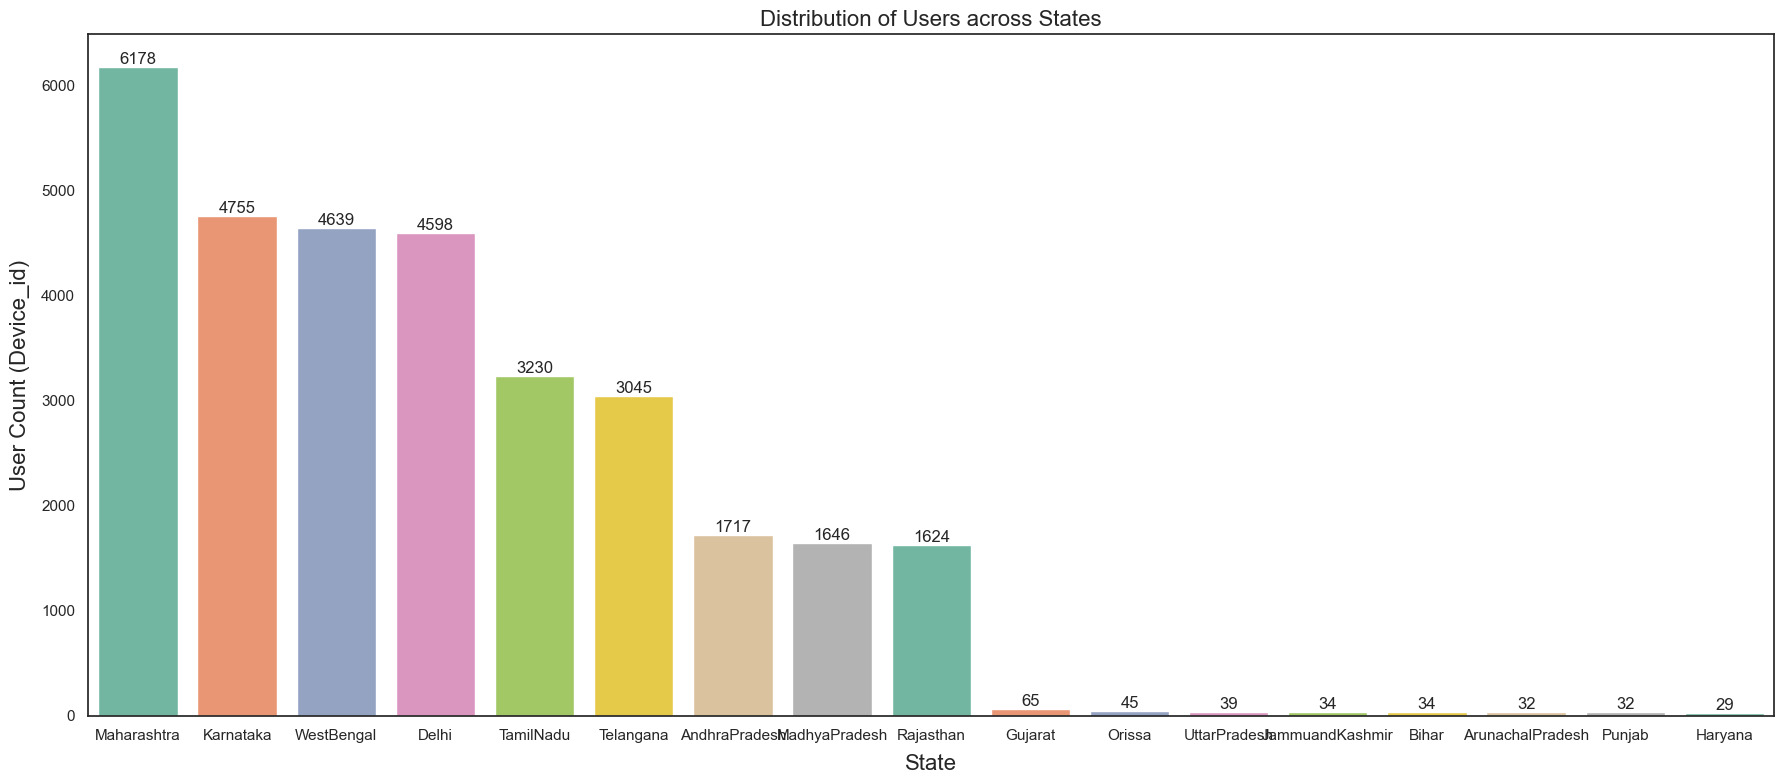

In [139]:
# Creating canvas
fig, ax = plt.subplots(figsize=(18, 8))

# Aggregate the State Name by the UNIQUE User (device_id):
state_events = df_mobile_data.groupby('state')['device_id'].nunique().sort_values(ascending=False).to_frame()
state_events.reset_index(inplace = True)

# Plot
sns.barplot(x=state_events.state, 
            y=state_events.device_id,
            palette='Set2')

for p in plt.gca().patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    value = round(y)
    ax.annotate(text=value, 
                xy=(x.mean(), y),
                ha='center', 
                va='bottom', 
                size=12)

plt.xlabel('State', size=16, labelpad=8)
plt.ylabel('User Count (Device_id)', size=16, labelpad=8)
plt.title(label='Distribution of Users across States', size=16)
plt.tight_layout()

- Out of **31,742** mobile users, **Maharastra** have **6178 (19%)** mobile users, which stands the top.
- Followed by **Karnataka(15%), West Bengal (15%), Delhi (14%), TamilNadu (10%)** are the **top 5** mobile user states.
- **Less than 1%** of mobile users are from the following states - **Gujarat, Orissa, UttarPradesh, JammuandKashmir, Bihar, ArunachalaPradesh, Punjab and Haryana**.

**<h4>Question 2: Distribution of Users across Phone Brands (Top 10 most used Phone Brands) </h4>**

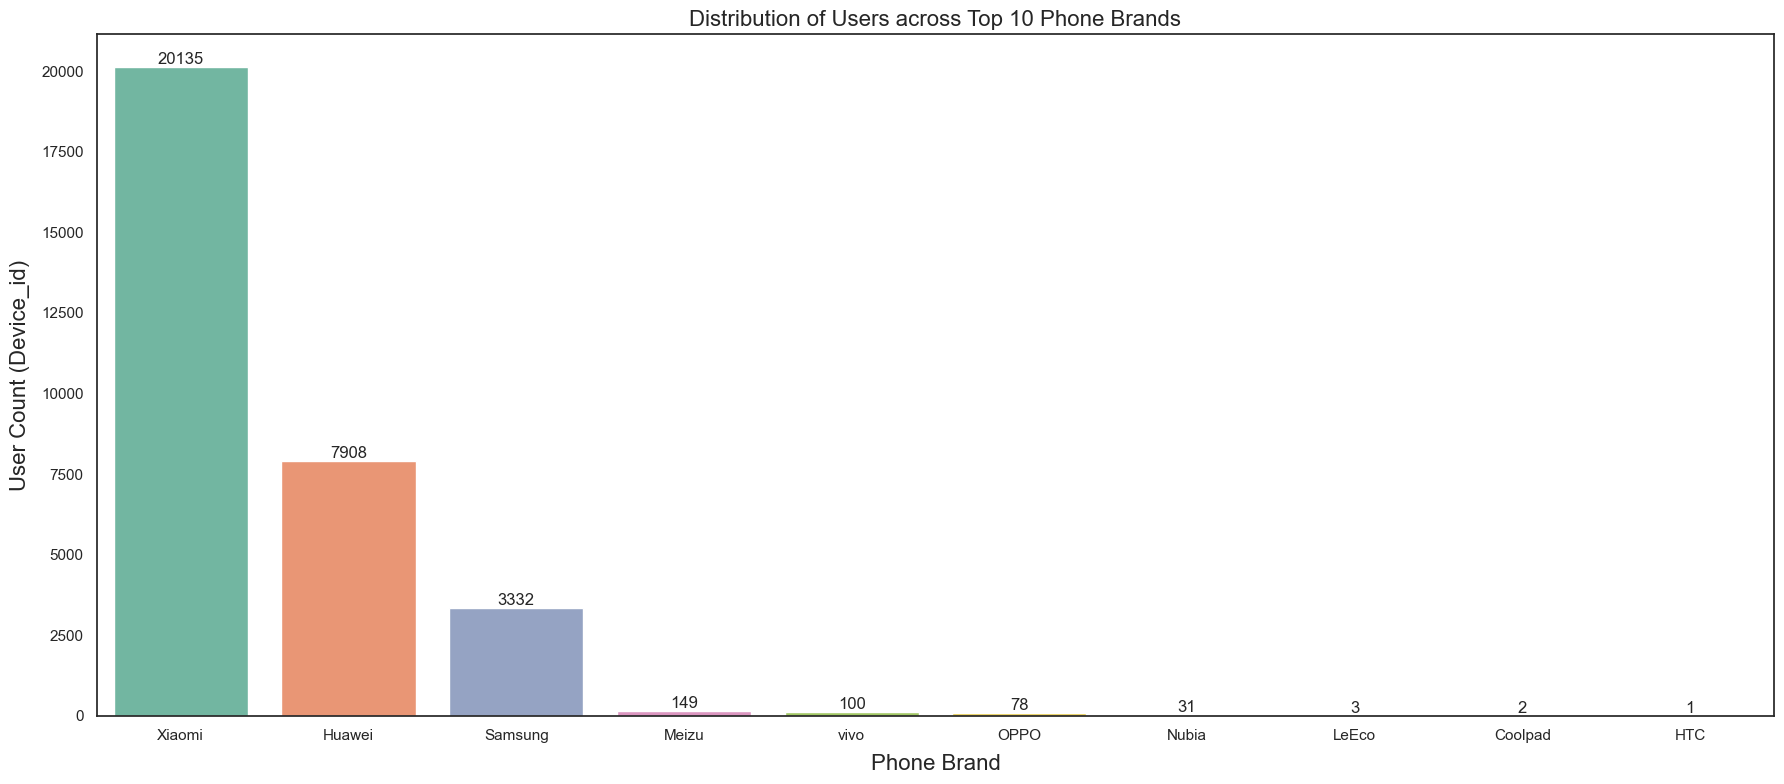

In [140]:
# Creating canvas
fig, ax = plt.subplots(figsize=(18, 8))

# Aggregate the Phone Brands by the UNIQUE User (device_id):
top10_ph = df_mobile_data.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).to_frame().head(10)
top10_ph.reset_index(inplace = True)

# Plot
sns.barplot(x=top10_ph.phone_brand, 
            y=top10_ph.device_id,
            palette='Set2')

for p in plt.gca().patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    value = round(y)
    ax.annotate(text=value, 
                xy=(x.mean(), y),
                ha='center', 
                va='bottom', 
                size=12)

plt.xlabel('Phone Brand', size=16, labelpad=8)
plt.ylabel('User Count (Device_id)', size=16, labelpad=8)
plt.title(label='Distribution of Users across Top 10 Phone Brands', size=16)
plt.tight_layout()

- **20135 (63%)** users are using the **Xiaomi** mobile Phone. Subsequently, **Huawei 7908 (25%)**, and **Samsung 3332 (10%)** are the top mobile brands used.
- Other mobiles Phones such as **Meizu, Vivo, Oppo, Nubia, LeEco, Coolpad, HTC** are **least used**. which is **below 1%**.

**<h4>Question 3: Distribution of Users across Gender </h4>**

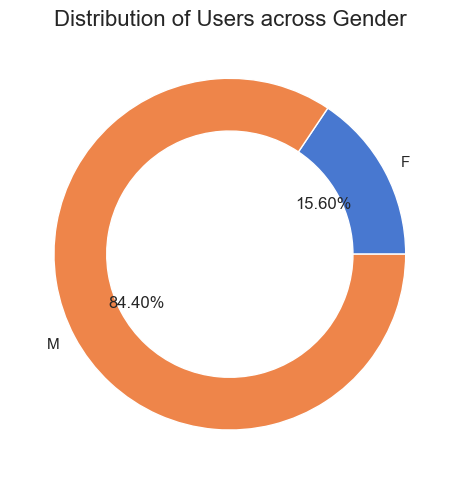

In [159]:
user_gender = df_mobile_data.groupby('gender')['device_id'].nunique().to_frame()
fig, ax = plt.subplots(figsize=(5, 5))

user_gender.plot.pie(ax=ax,
                    subplots=True,
                    autopct='%.2f%%',
                    wedgeprops=dict(width=0.3)
                   )
plt.ylabel(None)
plt.title(label='Distribution of Users across Gender', size=16)
plt.legend().remove()
plt.tight_layout()

- **84.40 %** of mobile users are **Male**. **15.60%** users are **Female**. It is clear that Male are high mobile consumers.

**<h4>Question 4: Distribution of Users across Age Segments </h4>**

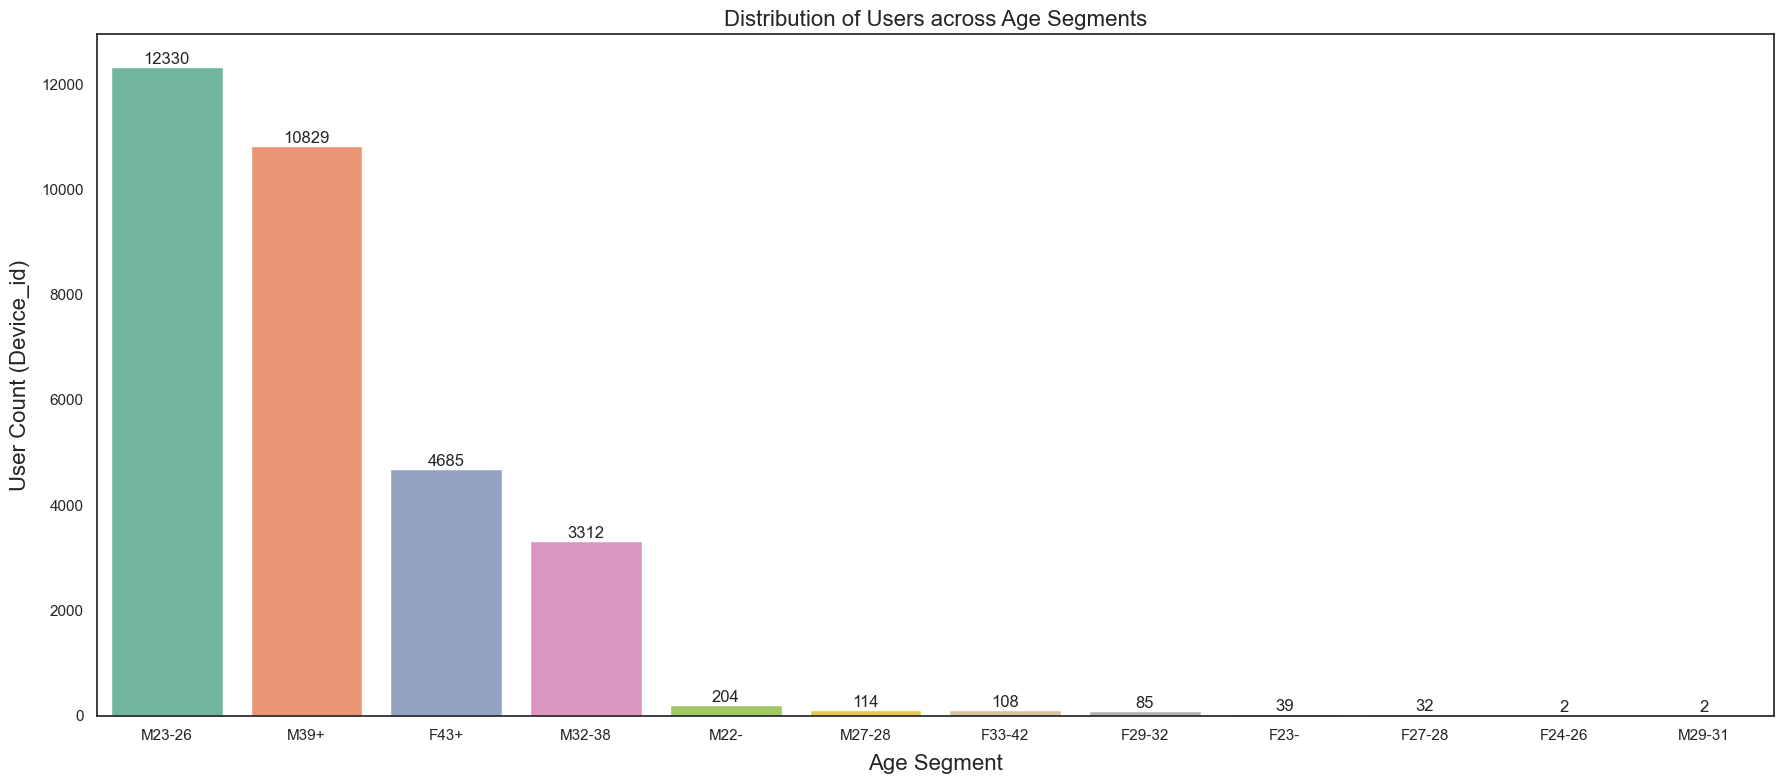

In [171]:
# Creating canvas
fig, ax = plt.subplots(figsize=(18, 8))

# Aggregate the User Age Group by the UNIQUE User (device_id):
user_age = df_mobile_data.groupby('group')['device_id'].nunique().sort_values(ascending=False).to_frame()
user_age.reset_index(inplace = True)

# Plot
sns.barplot(x=user_age.group, 
            y=user_age.device_id,
            palette='Set2')

for p in plt.gca().patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    value = round(y)
    ax.annotate(text=value, 
                xy=(x.mean(), y),
                ha='center', 
                va='bottom', 
                size=12)

plt.xlabel('Age Segment', size=16, labelpad=8)
plt.ylabel('User Count (Device_id)', size=16, labelpad=8)
plt.title(label='Distribution of Users across Age Segments', size=16)
plt.tight_layout()

- **Age group M23-26 12,330 (39%), M39+ 10829 (34%), F43+ 4685 (15%), M32-38 3312 (10%)** are the Top users of mobile service.
- **Adult Male groups (M23-26), (M39+), M32-38)** are the **top users of mobile**.
- **Female of Middle Age Adult and Above (F43+)** are the top users of mobile.

**<h4>Question 5: Distribution of Phone Brands for each Age Segment, State, Gender </h4>**

****<h5>5.1: Distribution of Phone Brands for each Age Segment </h4>****

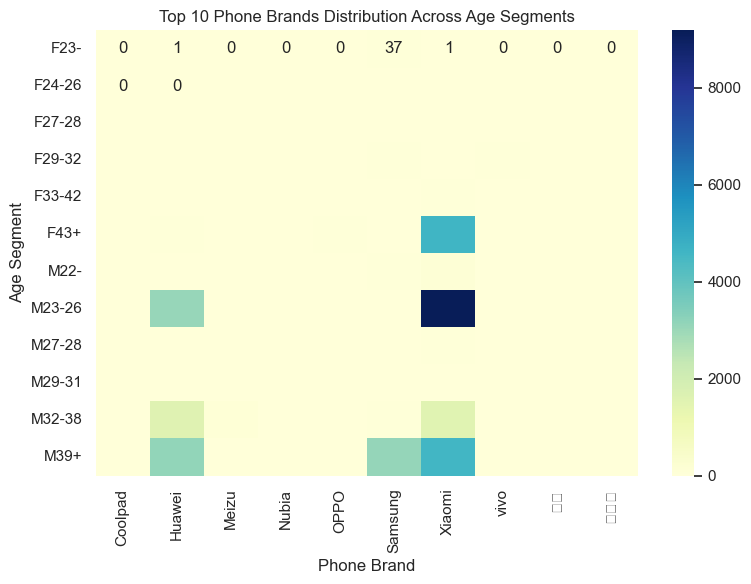

In [239]:
top_brands = df_mobile_data['phone_brand'].value_counts().head(10)
if 'phone_brand' in df_mobile_data.columns and 'group' in df_mobile_data.columns:
    # Filter for top 10 brands
    
    top_brands_list = top_brands.index.tolist()
    df_top_brands = df_mobile_data[df_mobile_data['phone_brand'].isin(top_brands_list)]

    # Pivot table: Age Segment vs Phone Brand
    phone_age_pivot = df_top_brands.pivot_table(index='group',
                                               columns='phone_brand',
                                               values='device_id',
                                               aggfunc='nunique').fillna(0)

    # Display numbers
    # print("\nNumber of Users for Top 10 Phone Brands across Age Segments:")
    # print(phone_age_pivot)

    # Plotting as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(phone_age_pivot, annot=True, fmt='g', cmap='YlGnBu')
    plt.title('Top 10 Phone Brands Distribution Across Age Segments')
    plt.xlabel('Phone Brand')
    plt.ylabel('Age Segment')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('phone_brand' and/or 'age_segment') are missing.")


- Heat Map Indicates that **Xiaomi** mobile is **most** and **widely** used **across** various **Age groups** - **Adult Male groups M23-26, M39+, M32-38** and **Female of Middle Age Adult and Above (F43+)**.
- Followed by, **Huawei** Mobile is used by **Adult Male Group - M23-26, M39+**.
- **Samsung** Mobile is used by **Middle Age Adult Male M39+**.

****<h5>5.2: Distribution of Phone Brands for each State </h4>****

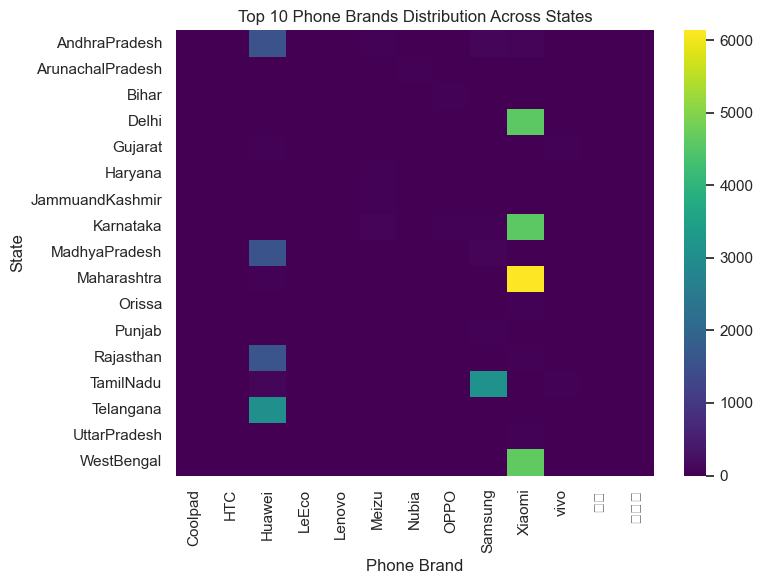

In [238]:
#5.2. Phone Brands by State
if 'state' in df_mobile_data.columns and 'phone_brand' in df_mobile_data.columns:
    # Pivot table: State vs Phone Brand
    top_brands_list = top_brands.index.tolist()
    phone_state_pivot = df_mobile_data.pivot_table(index='state',
                                                columns='phone_brand',
                                                values='device_id',
                                                aggfunc='nunique').fillna(0)

    # Display numbers
    # print("\nNumber of Users for Top 10 Phone Brands across States:")
    # print(phone_state_pivot)

    # Plotting as a heatmap (may be cluttered if many states)
    plt.figure(figsize=(8, 6))
    sns.heatmap(phone_state_pivot, annot=False, cmap='viridis')
    plt.title('Top 10 Phone Brands Distribution Across States')
    plt.xlabel('Phone Brand')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('state' and/or 'phone_brand') are missing.")

- **Xiaomi** mobile is used across different states - **Maharastra, Karnataka, West Bengal, Delhi**. Maharastra is being the top.
- **Huawei** mobile is used in **Telangana, Rajastan, and MadhyaPradesh**.
- **Samsung** mobile is used in **Tamilnadu**.

****<h5>5.3: Distribution of Phone Brands for Gender </h4>****

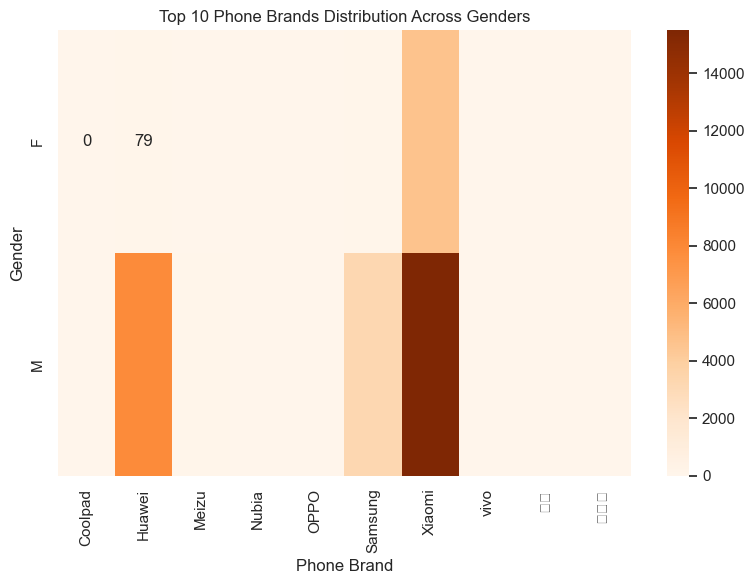

In [237]:
#5.3. Phone Brands by Gender
if 'gender' in df_mobile_data.columns and 'phone_brand' in df_mobile_data.columns:
    # Pivot table: Gender vs Phone Brand
    phone_gender_pivot = df_top_brands.pivot_table(index='gender',
                                                 columns='phone_brand',
                                                 values='device_id',
                                                 aggfunc='nunique').fillna(0)

    # Display numbers
    # print("\nNumber of Users for Top 10 Phone Brands across Genders:")
    # print(phone_gender_pivot)

    # Plotting as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(phone_gender_pivot, annot=True, fmt='g', cmap='Oranges')
    plt.title('Top 10 Phone Brands Distribution Across Genders')
    plt.xlabel('Phone Brand')
    plt.ylabel('Gender')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('gender' and/or 'phone_brand') are missing.")

- **Xiaomi** mobile is used by **Majority** of **Male** and **Female** users. **Significant** users are **Male**. 
- **Huawei** & **Samsung** mobile is used by **Male** users, **negligable** users are **Female**.

**<h4>Question 6: Distribution of Gender for each State, Age Segment, and Top 10 Phone Brand </h4>**

****<h5>6.1: Distribution of Gender for each Phone Brand </h4>****

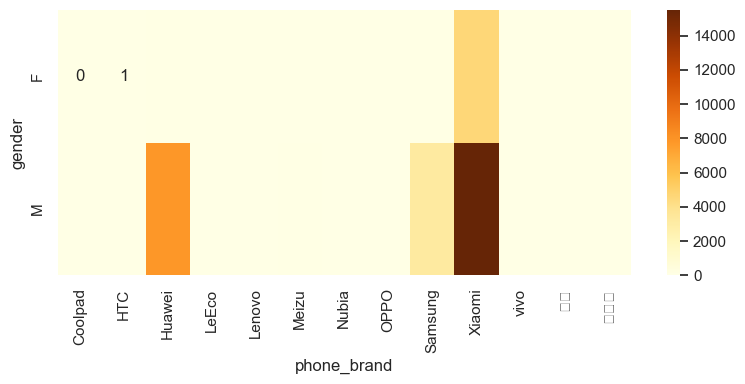

In [249]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean1 = pd.crosstab(df_mobile_data['gender'], df_mobile_data['phone_brand'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean1, cmap='YlOrBr', annot=True)
plt.tight_layout()

- **Xiaomi** mobile is used by **Majority** of **Male** and **Female** users. **Significant** users are **Male**. 
- **Huawei** & **Samsung** mobile is used by **Male** users, **negligable** users are **Female**.

****<h5>6.2: Distribution of Gender for each State </h4>****

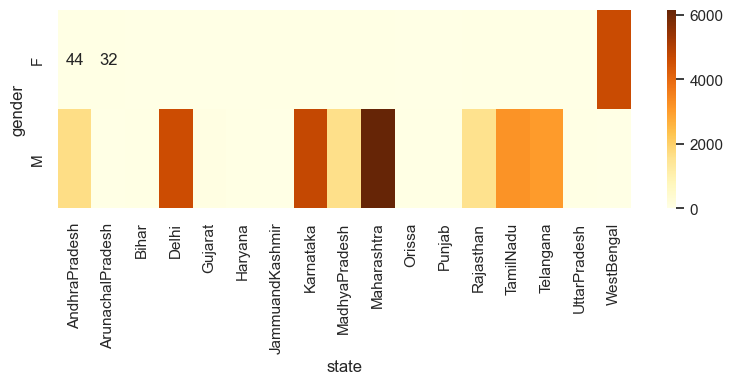

In [256]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean2 = pd.crosstab(df_mobile_data['gender'], df_mobile_data['state'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean2, cmap='YlOrBr', annot=True)
plt.tight_layout()

- **Male mobile users** have significant presence across different states - **Maharastra, Karnataka, West Bengal, Delhi, Tamilnadu, Telengana**. **Maharastra** being the **top male user**.
- **West Bengal** is the only state have the **significant Female users**. 

****<h5>6.3: Distribution of Gender for each Age Segment </h4>****

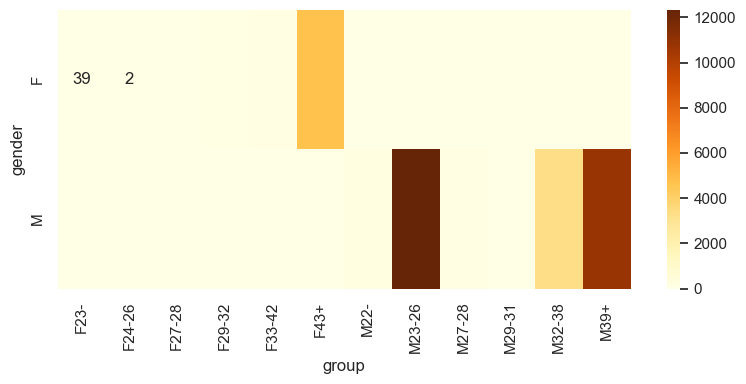

In [258]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean3 = pd.crosstab(df_mobile_data['gender'], df_mobile_data['group'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean3, cmap='YlOrBr', annot=True)
plt.tight_layout()

- **Male** belongs to the **Age group M23-26** is the **top** among the mobile users. Followed by, Age group **M39+ and M32-38**.
- **Significant Female** users are from the **Age group F43+**.

**<h4>Question 7: Distribution of Age Segments for each State, Gender, and Top 10 Phone Brand </h4>**

****<h5>7.1: Distribution of Age Segment for each State</h4>****

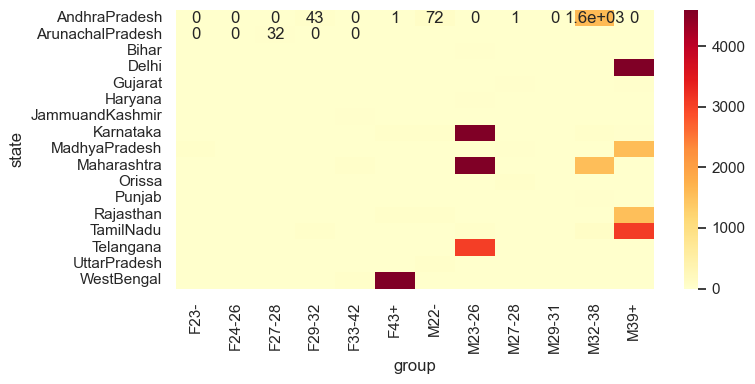

In [266]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean4 = pd.crosstab(df_mobile_data['state'], df_mobile_data['group'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean4, cmap='YlOrRd', annot=True)
plt.tight_layout()

- **Male group M23-26** have significant contribution across different states - **Maharastra, Karnataka, Telengana**.
- Followed by, **Male** users in Age group **M39+** in **Delhi, Tamilnadu, MathyaPradesh, Rajastan**.
- Majority of the Female age group **F43+** are from **West Bengal**.

****<h5>7.2: Distribution of Age Segment for Gender</h4>****

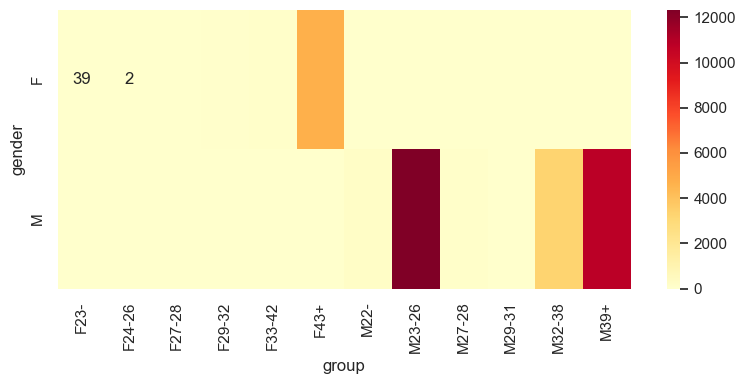

In [267]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean5 = pd.crosstab(df_mobile_data['gender'], df_mobile_data['group'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean5, cmap='YlOrRd', annot=True)
plt.tight_layout()

- **Majority** of **Male** users are belongs to the age group **M23-26**. Followed by **M39+** and **M32-38**.
- **Most** of the **Female** users are belongs to the age group **F43+**.

****<h5>7.3: Distribution of Age Segment for Top 10 Phone Brand</h4>****

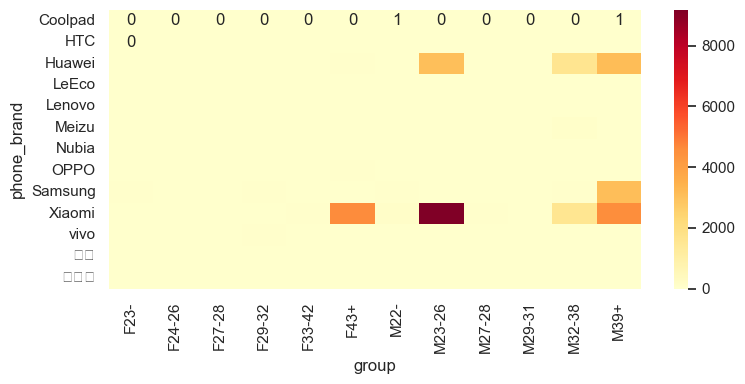

In [270]:
fig, my_ax = plt.subplots(figsize=(8, 4))
ct_mean5 = pd.crosstab(df_mobile_data['phone_brand'], df_mobile_data['group'],values=df_mobile_data['device_id'], aggfunc='nunique').fillna(0)
sns.heatmap(ct_mean5, cmap='YlOrRd', annot=True)
plt.tight_layout()

- Refer the Graph 5.1

**<h4>Question 8: Hourly distribution of Phone Calls </h4>**

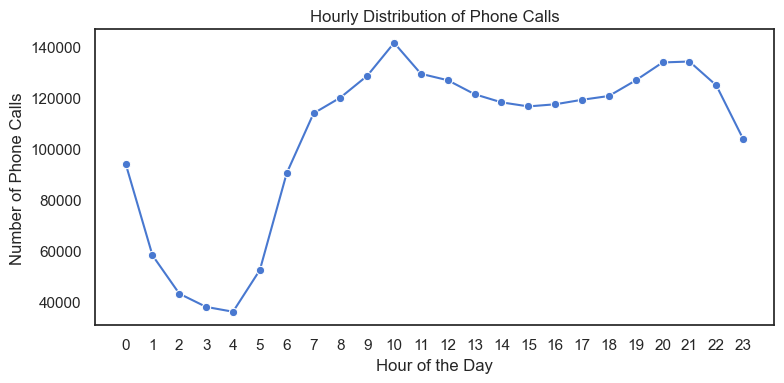

In [224]:
#8. Hourly Distribution of Phone Calls
#Objective:
#Analyze the distribution of phone calls over different hours of the day to identify peak usage times.

#Implementation:
df_mobile_data['timestamp'] = pd.to_datetime(df_mobile_data['timestamp'], errors='coerce')

#Assuming the timestamp column contains datetime information related to phone calls or events.
if 'timestamp' in df_mobile_data.columns:
    # Extract hour from timestamp
    df_mobile_data['call_hour'] = df_mobile_data['timestamp'].dt.hour

    # Count of phone calls per hour
    calls_per_hour = df_mobile_data['call_hour'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=calls_per_hour.index, y=calls_per_hour.values, marker='o')
    plt.title('Hourly Distribution of Phone Calls')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Phone Calls')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()
else:
    print("Column 'timestamp' does not exist in the DataFrame.")


- **Mobile** usage **drops** gradually **after 12 AM**. **Least** usage during **3-4 AM**.
- Mobile usage **sharply increase after 4 AM** and reaches the **peak** at **10 AM**.
- **Steady** usage in the **Noon** time and **drops** after **10 PM**.

**<h4>Question 9: Distribution of Users across States in Map </h4>**

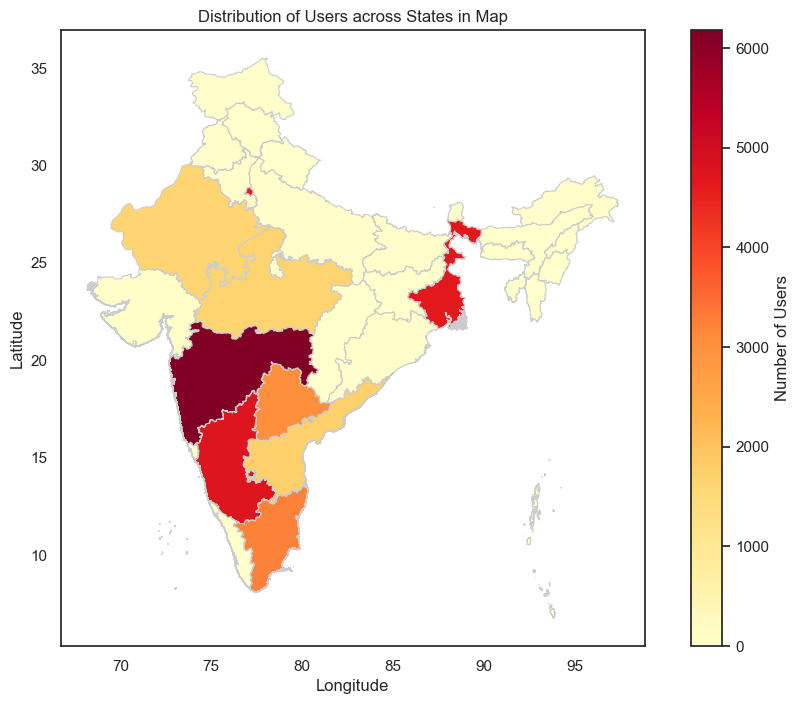

In [194]:
india_map['NAME_1'] = india_map['NAME_1'].apply(lambda x: x.replace(' ', ''))
india_map = india_map.merge(state_events, left_on='NAME_1', right_on='state', how = 'left')
india_map.fillna({'device_id':0}, inplace=True)
fig, ax = plt.subplots(1, figsize=(12, 8))
india_map.plot(column='device_id', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Number of Users"})
ax.set_title('Distribution of Users across States in Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude') 
plt.show()

- Map shows **Maharastra** have majority of the mobile users.
- Followed by **Karnataka, West Bengal, Delhi, TamilNadu & Telangana** states have the **significant** mobile users.

<a name = Section8></a>

---
# **7. Conclusion**
---

- Out of **31,742** mobile users, **Maharastra** have **6178 (19%)** mobile users, which stands the top. Followed by **Karnataka (15%), West Bengal (15%), Delhi (14%), TamilNadu (10%)** are the **Top 5** mobile user states. **West Bengal** have the **significant Female users**, rest of the state are dominated by Male users.
- **20135 (63%)** users are using the **Xiaomi** mobile Phone. Subsequently, **Huawei 7908 (25%)**, and **Samsung 3332 (10%)** are the top mobile brands used. Other mobile brands such as **Meizu, Vivo, Oppo, Nubia, LeEco, Coolpad, HTC** are **least used**. which is **below 1%**.
- **84.40 %** of mobile users are **Male**. **15.60%** users are **Female**. 
- **Adult Male groups (M23-26), (M39+), (M32-38)** are the **top users of mobile brands Xiaomi, Huawei, Samsung**. **Female of Middle Age Adult and Above (F43+)** are the top users uses Samsung mobile.
- **Xiaomi** mobile is used across different states - **Maharastra, Karnataka, West Bengal, Delhi**. Maharastra is being the top.
- **Huawei** mobile is used in **Telangana, Rajastan, and MadhyaPradesh**. **Samsung** mobile is used in **Tamilnadu**.
- **Mobile** usage **drops** gradually **after 12 AM**. **Least** usage during **3-4 AM**.  Mobile usage **sharply increase after 4 AM** and reaches the **peak** at **10 AM** - **Steady** usage in the **Noon** time and **drops** after **10 PM**.

<a name = Section8></a>

---
# **8. Actionable Insights**
---

- **Marketing and Product Strategy:**
   - Since **Xiaomi dominates** the market, **other brands** (like **Huawei and Samsung**) could focus on **improving brand presence** and **competitive pricing** to capture Xiaomi’s large user base.
   - **Lesser-used brands** (e.g., **Meizu, Vivo, Oppo**) could target niche features or marketing strategies to attract users dissatisfied with popular options.

- **Targeted Advertising**:
   - **Adult male groups (M23-26, M32-38, M39+)** are the primary users, so **brands could tailor advertisements, content, and promotions specifically for these age groups**.
   - For **female** users, a focus on the **F43+** age group with tailored products (e.g., **ease of use, specific features like accessibility options**) could **increase engagement and user satisfaction**.

- **State-Specific Campaigns:**
   - **Maharashtra, Karnataka, and West Bengal** could benefit from **state-specific marketing campaigns** that cater to user preferences and trending features in these regions.
   - Leveraging regional festivals or significant local events in states like Maharashtra and Karnataka can increase visibility and brand loyalty.

- **Gender Inclusivity Initiatives:**
   - The data reveals a significant male dominance (84.4%) in mobile usage. Brands can explore partnerships and features that resonate with female audiences, possibly by collaborating with influencers, focusing on health-tracking features, or promoting products tailored to women’s needs.
   - Educational or skill-based apps and features for women in less-served demographics could also widen the user base.

- **Partnerships and Loyalty Programs:**
   - Brands could create loyalty programs with tech accessory companies in Maharashtra or the top states to incentivize existing customers and retain them amid high competition.
   - Partnerships with regional e-commerce platforms to offer special bundles or deals exclusive to certain states could also drive sales.

These insights could guide companies in the mobile sector to make data-driven decisions, focusing on regional growth, improving brand equity, and widening market penetration.